In [ ]:
%pip install -r requirements.txt

In [1]:
import argparse
from pykeen.hpo import hpo_pipeline
from pykeen.triples import TriplesFactory
from rdflib import Graph
import os
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import yaml


In [2]:
def load_config(config_path: str) -> dict:
    """Load a YAML config file"""

    with open(config_path, "r", encoding="utf-8") as file:
        config = yaml.safe_load(file)

    return config

In [3]:
# Function to convert turtle KG file to TSV
def turtle_to_tsv(input_file, output_file):
    # Load the Turtle file into an RDFLib Graph
    g = Graph()
    g.parse(input_file, format='turtle')

    # Open the TSV file for writing
    with open(output_file, 'w') as tsvfile:
        # Iterate over triples and write them to the TSV file
        for subj, pred, obj in g:
            tsvfile.write(f"{subj}\t{pred}\t{obj}\n")

In [ ]:
# Generate TSV file from Turtle KG
input_file = 'input.ttl'  # Replace with your Turtle file path
output_file = 'output.tsv'  # Output TSV file path
turtle_to_tsv(input_file, output_file)

In [4]:
# Function to generate experiment name from experiment configuration - useful to saving artifacts
def generate_experiment_name(model_name, sampler_name):
    """Generate a unique experiment name based on the combination of parameters"""
    return f"{model_name}_hpo_{sampler_name}"

In [5]:
def run_hpo(config: dict) -> None:
    """Run a HPO run using the provided config"""

    tf = TriplesFactory.from_path('output.tsv', create_inverse_triples=config["train"]["create_inverse"])
    training, testing, validation = tf.split([.8, .1, .1])

    for model in config["models"]:
        for sampler in config["hpo"]["sampler"]:

            experiment_name = generate_experiment_name(model["name"], sampler)
            experiment_path = os.path.join(config["save"]["path"], experiment_name)

            hpo_pipeline_result = hpo_pipeline(
                study_name=experiment_name,
                n_trials=config["hpo"]["ntrials"],
                pruner="MedianPruner",
                sampler=sampler,
                training=training,
                testing=testing,
                validation=validation,
                model=model["name"],
                model_kwargs={
                    "random_seed": config["seed"],
                },
                model_kwargs_ranges=dict(
                    embedding_dim=dict(
                        type=int,
                        low=config["hpo"]["emb"]["low"],
                        high=config["hpo"]["emb"]["high"],
                        q=config["hpo"]["emb"]["step"],
                    ),
                ),
                training_loop="sLCWA",
                training_kwargs_ranges=dict(
                    num_epochs=dict(
                        type=int,
                        low=config["hpo"]["num_epochs"]["low"],
                        high=config["hpo"]["num_epochs"]["high"],
                        q=config["hpo"]["num_epochs"]["step"],
                    ),
                ),
                optimizer=config["optimizer"]["class"],
                optimizer_kwargs_ranges=dict(
                    lr=dict(
                        type=float,
                        low=config["hpo"]["lr"]["low"],
                        high=config["hpo"]["lr"]["high"],
                    ),
                ),
                negative_sampler_kwargs_ranges=dict(
                    num_negs_per_pos=dict(
                        type=int,
                        low=config["hpo"]["neg"]["low"],
                        high=config["hpo"]["neg"]["high"],
                        q=config["hpo"]["neg"]["step"],
                    ),
                ),
                evaluator_kwargs={"filtered": True},
            )

            hpo_pipeline_result.save_to_directory(experiment_path)

    print("Run Complete!")

In [ ]:
# Directly assign the path to your YAML configuration file here
config_path = './config.yaml'

run_config = load_config(config_path)

assert run_config["type"] == "hpo", "Incorrect Config Type"

run_hpo(run_config)

using automatically assigned random_state=2552244036
[I 2024-02-13 20:43:46,663] A new study created in memory with name: TransE_hpo_tpe
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
No random seed is specified. Setting to 1805209291.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:375: UserWarning: Directly use Embedding.shape instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.shape instead of num_embeddings.")


Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.05s seconds
[I 2024-02-13 20:44:05,178] Trial 0 finished with value: 0.11110653706910807 and parameters: {'model.embedding_dim': 224, 'model.scoring_fct_norm': 2, 'loss.margin': 0.8820220872480217, 'optimizer.lr': 0.03045065436989952, 'negative_sampler.num_negs_per_pos': 71, 'training.num_epochs': 50, 'training.batch_size': 2732}. Best is trial 0 with value: 0.11110653706910807.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 20:44:11,662] Trial 1 finished with value: 0.11689132505038807 and parameters: {'model.embedding_dim': 512, 'model.scoring_fct_norm': 2, 'loss.margin': 1.9636034614880256, 'optimizer.lr': 0.04988477639763508, 'negative_sampler.num_negs_per_pos': 41, 'training.num_epochs': 20, 'training.batch_size': 3932}. Best is trial 1 with value: 0.11689132505038807.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 20:44:17,760] Trial 2 finished with value: 0.10484683149100428 and parameters: {'model.embedding_dim': 480, 'model.scoring_fct_norm': 2, 'loss.margin': 1.428417554384464, 'optimizer.lr': 0.08460745148252408, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 20, 'training.batch_size': 932}. Best is trial 1 with value: 0.11689132505038807.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/en

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
[I 2024-02-13 20:44:23,685] Trial 3 finished with value: 0.07953838416889442 and parameters: {'model.embedding_dim': 336, 'model.scoring_fct_norm': 1, 'loss.margin': 0.37289528406648553, 'optimizer.lr': 0.06762626675449263, 'negative_sampler.num_negs_per_pos': 21, 'training.num_epochs': 30, 'training.batch_size': 2232}. Best is trial 1 with value: 0.11689132505038807.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 20:44:28,371] Trial 4 finished with value: 0.08571248665766146 and parameters: {'model.embedding_dim': 496, 'model.scoring_fct_norm': 1, 'loss.margin': 1.743526416577169, 'optimizer.lr': 0.08202728171293647, 'negative_sampler.num_negs_per_pos': 51, 'training.num_epochs': 20, 'training.batch_size': 632}. Best is trial 1 with value: 0.11689132505038807.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/en

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
[I 2024-02-13 20:44:35,183] Trial 5 finished with value: 0.11500730732946064 and parameters: {'model.embedding_dim': 272, 'model.scoring_fct_norm': 2, 'loss.margin': 2.1329509953458596, 'optimizer.lr': 0.027020834876568377, 'negative_sampler.num_negs_per_pos': 1, 'training.num_epochs': 50, 'training.batch_size': 2832}. Best is trial 1 with value: 0.11689132505038807.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.05s seconds
[I 2024-02-13 20:44:39,794] Trial 6 finished with value: 0.06458601707559006 and parameters: {'model.embedding_dim': 80, 'model.scoring_fct_norm': 1, 'loss.margin': 2.468445993887248, 'optimizer.lr': 0.05261306145910974, 'negative_sampler.num_negs_per_pos': 1, 'training.num_epochs': 30, 'training.batch_size': 2632}. Best is trial 1 with value: 0.11689132505038807.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/env

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 20:45:00,056] Trial 7 finished with value: 0.1322499352037728 and parameters: {'model.embedding_dim': 496, 'model.scoring_fct_norm': 2, 'loss.margin': 0.9317679102450387, 'optimizer.lr': 0.06470993108949001, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 30, 'training.batch_size': 3832}. Best is trial 7 with value: 0.1322499352037728.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/en

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
[I 2024-02-13 20:45:04,562] Trial 8 finished with value: 0.10907847953005777 and parameters: {'model.embedding_dim': 128, 'model.scoring_fct_norm': 2, 'loss.margin': 2.9012396553125623, 'optimizer.lr': 0.018496837600751926, 'negative_sampler.num_negs_per_pos': 71, 'training.num_epochs': 20, 'training.batch_size': 232}. Best is trial 7 with value: 0.1322499352037728.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/e

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 20:45:07,587] Trial 9 finished with value: 0.11822676668853528 and parameters: {'model.embedding_dim': 400, 'model.scoring_fct_norm': 2, 'loss.margin': 0.9143851452615965, 'optimizer.lr': 0.05995291892321925, 'negative_sampler.num_negs_per_pos': 21, 'training.num_epochs': 10, 'training.batch_size': 2432}. Best is trial 7 with value: 0.1322499352037728.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/e

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.04s seconds
[I 2024-02-13 20:45:29,805] Trial 10 finished with value: 0.02046285571528427 and parameters: {'model.embedding_dim': 16, 'model.scoring_fct_norm': 1, 'loss.margin': 0.1706427186519689, 'optimizer.lr': 0.09352634316464653, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 40, 'training.batch_size': 3932}. Best is trial 7 with value: 0.1322499352037728.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 20:45:32,575] Trial 11 finished with value: 0.12443413951122352 and parameters: {'model.embedding_dim': 384, 'model.scoring_fct_norm': 2, 'loss.margin': 1.0210284137647847, 'optimizer.lr': 0.05644192710825434, 'negative_sampler.num_negs_per_pos': 31, 'training.num_epochs': 10, 'training.batch_size': 1532}. Best is trial 7 with value: 0.1322499352037728.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 20:45:36,135] Trial 12 finished with value: 0.113750367391605 and parameters: {'model.embedding_dim': 400, 'model.scoring_fct_norm': 2, 'loss.margin': 1.1360245031493514, 'optimizer.lr': 0.04032608386802462, 'negative_sampler.num_negs_per_pos': 71, 'training.num_epochs': 10, 'training.batch_size': 1432}. Best is trial 7 with value: 0.1322499352037728.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/en

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 20:45:44,752] Trial 13 finished with value: 0.08689751139603312 and parameters: {'model.embedding_dim': 400, 'model.scoring_fct_norm': 2, 'loss.margin': 0.5284072082838394, 'optimizer.lr': 0.06962606896821794, 'negative_sampler.num_negs_per_pos': 31, 'training.num_epochs': 40, 'training.batch_size': 1632}. Best is trial 7 with value: 0.1322499352037728.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 20:45:51,388] Trial 14 finished with value: 0.0564516257890711 and parameters: {'model.embedding_dim': 320, 'model.scoring_fct_norm': 2, 'loss.margin': 1.3858143637757308, 'optimizer.lr': 0.004051003125550158, 'negative_sampler.num_negs_per_pos': 81, 'training.num_epochs': 10, 'training.batch_size': 3332}. Best is trial 7 with value: 0.1322499352037728.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 20:46:03,830] Trial 15 finished with value: 0.08829044313135478 and parameters: {'model.embedding_dim': 416, 'model.scoring_fct_norm': 2, 'loss.margin': 0.6466607969013722, 'optimizer.lr': 0.07312523240562652, 'negative_sampler.num_negs_per_pos': 51, 'training.num_epochs': 40, 'training.batch_size': 1732}. Best is trial 7 with value: 0.1322499352037728.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 20:46:15,361] Trial 16 finished with value: 0.13283599726808182 and parameters: {'model.embedding_dim': 448, 'model.scoring_fct_norm': 2, 'loss.margin': 1.1977515796429477, 'optimizer.lr': 0.045964508100012604, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 30, 'training.batch_size': 1132}. Best is trial 16 with value: 0.13283599726808182.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncl

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 20:46:26,712] Trial 17 finished with value: 0.0608666979000546 and parameters: {'model.embedding_dim': 448, 'model.scoring_fct_norm': 1, 'loss.margin': 1.4169248893386974, 'optimizer.lr': 0.03663075015438339, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 30, 'training.batch_size': 1132}. Best is trial 16 with value: 0.13283599726808182.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
[I 2024-02-13 20:46:53,614] Trial 18 finished with value: 0.06101805899672794 and parameters: {'model.embedding_dim': 192, 'model.scoring_fct_norm': 2, 'loss.margin': 0.1450294823963626, 'optimizer.lr': 0.04371035966525764, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 40, 'training.batch_size': 3332}. Best is trial 16 with value: 0.13283599726808182.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 20:47:02,683] Trial 19 finished with value: 0.12058124610385729 and parameters: {'model.embedding_dim': 320, 'model.scoring_fct_norm': 2, 'loss.margin': 1.6825358843633667, 'optimizer.lr': 0.0992837001045058, 'negative_sampler.num_negs_per_pos': 81, 'training.num_epochs': 30, 'training.batch_size': 232}. Best is trial 16 with value: 0.13283599726808182.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 20:47:16,728] Trial 20 finished with value: 0.05878403019204869 and parameters: {'model.embedding_dim': 464, 'model.scoring_fct_norm': 1, 'loss.margin': 0.6736793732563159, 'optimizer.lr': 0.01945997145599569, 'negative_sampler.num_negs_per_pos': 61, 'training.num_epochs': 40, 'training.batch_size': 1932}. Best is trial 16 with value: 0.13283599726808182.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 20:47:24,888] Trial 21 finished with value: 0.13553111041071644 and parameters: {'model.embedding_dim': 368, 'model.scoring_fct_norm': 2, 'loss.margin': 1.0922421402337879, 'optimizer.lr': 0.06079564093264027, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 20, 'training.batch_size': 1232}. Best is trial 21 with value: 0.13553111041071644.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclo

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 20:47:32,264] Trial 22 finished with value: 0.13157204971976308 and parameters: {'model.embedding_dim': 352, 'model.scoring_fct_norm': 2, 'loss.margin': 1.1559038879692325, 'optimizer.lr': 0.06115554391872914, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 20, 'training.batch_size': 732}. Best is trial 21 with value: 0.13553111041071644.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 20:47:43,714] Trial 23 finished with value: 0.1259444695472268 and parameters: {'model.embedding_dim': 448, 'model.scoring_fct_norm': 2, 'loss.margin': 1.2126416468075953, 'optimizer.lr': 0.07827889294945876, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 30, 'training.batch_size': 1232}. Best is trial 21 with value: 0.13553111041071644.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 20:47:53,967] Trial 24 finished with value: 0.13224343552584658 and parameters: {'model.embedding_dim': 512, 'model.scoring_fct_norm': 2, 'loss.margin': 0.7937964903334795, 'optimizer.lr': 0.04790936600571406, 'negative_sampler.num_negs_per_pos': 81, 'training.num_epochs': 30, 'training.batch_size': 532}. Best is trial 21 with value: 0.13553111041071644.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
[I 2024-02-13 20:48:03,461] Trial 25 finished with value: 0.12610148812225577 and parameters: {'model.embedding_dim': 288, 'model.scoring_fct_norm': 2, 'loss.margin': 1.7114787819611106, 'optimizer.lr': 0.06303825907765961, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 20, 'training.batch_size': 2132}. Best is trial 21 with value: 0.13553111041071644.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclo

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 20:48:24,838] Trial 26 finished with value: 0.12232370497725896 and parameters: {'model.embedding_dim': 432, 'model.scoring_fct_norm': 2, 'loss.margin': 1.2217689744461913, 'optimizer.lr': 0.07583337792515624, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 30, 'training.batch_size': 3232}. Best is trial 21 with value: 0.13553111041071644.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 20:48:32,406] Trial 27 finished with value: 0.0855059734911384 and parameters: {'model.embedding_dim': 368, 'model.scoring_fct_norm': 2, 'loss.margin': 0.3348070656641635, 'optimizer.lr': 0.0864389070049415, 'negative_sampler.num_negs_per_pos': 81, 'training.num_epochs': 20, 'training.batch_size': 1132}. Best is trial 21 with value: 0.13553111041071644.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 20:48:42,318] Trial 28 finished with value: 0.112656703125456 and parameters: {'model.embedding_dim': 464, 'model.scoring_fct_norm': 2, 'loss.margin': 2.0612746764798024, 'optimizer.lr': 0.03451370799444757, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 20, 'training.batch_size': 1932}. Best is trial 21 with value: 0.13553111041071644.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.05s seconds
[I 2024-02-13 20:48:51,563] Trial 29 finished with value: 0.12258599207984933 and parameters: {'model.embedding_dim': 192, 'model.scoring_fct_norm': 2, 'loss.margin': 0.8609986337494492, 'optimizer.lr': 0.06589850363790847, 'negative_sampler.num_negs_per_pos': 61, 'training.num_epochs': 30, 'training.batch_size': 932}. Best is trial 21 with value: 0.13553111041071644.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
[I 2024-02-13 20:49:07,884] Trial 30 finished with value: 0.1326431814954323 and parameters: {'model.embedding_dim': 432, 'model.scoring_fct_norm': 2, 'loss.margin': 1.0107809099308978, 'optimizer.lr': 0.05287251489625956, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 50, 'training.batch_size': 432}. Best is trial 21 with value: 0.13553111041071644.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 20:49:25,550] Trial 31 finished with value: 0.13766676589684276 and parameters: {'model.embedding_dim': 432, 'model.scoring_fct_norm': 2, 'loss.margin': 0.963706014922756, 'optimizer.lr': 0.05484158645428057, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 50, 'training.batch_size': 132}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 20:49:52,399] Trial 32 finished with value: 0.11661341685834369 and parameters: {'model.embedding_dim': 432, 'model.scoring_fct_norm': 2, 'loss.margin': 1.5815381164723634, 'optimizer.lr': 0.056187597242262965, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 50, 'training.batch_size': 32}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 20:50:09,273] Trial 33 finished with value: 0.13590016765647095 and parameters: {'model.embedding_dim': 368, 'model.scoring_fct_norm': 2, 'loss.margin': 1.0802573839850471, 'optimizer.lr': 0.04596470381395667, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 50, 'training.batch_size': 432}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 20:50:27,471] Trial 34 finished with value: 0.12194805216307736 and parameters: {'model.embedding_dim': 368, 'model.scoring_fct_norm': 2, 'loss.margin': 1.3630925024163492, 'optimizer.lr': 0.045730522011640864, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 50, 'training.batch_size': 832}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclo

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
[I 2024-02-13 20:50:53,131] Trial 35 finished with value: 0.11162449140787627 and parameters: {'model.embedding_dim': 304, 'model.scoring_fct_norm': 2, 'loss.margin': 1.9040401448972273, 'optimizer.lr': 0.02993302583180447, 'negative_sampler.num_negs_per_pos': 81, 'training.num_epochs': 50, 'training.batch_size': 32}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
[I 2024-02-13 20:51:06,356] Trial 36 finished with value: 0.08388710540663817 and parameters: {'model.embedding_dim': 240, 'model.scoring_fct_norm': 2, 'loss.margin': 0.4883904727767992, 'optimizer.lr': 0.04060460571141107, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 40, 'training.batch_size': 332}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 20:51:21,616] Trial 37 finished with value: 0.0762949449803058 and parameters: {'model.embedding_dim': 336, 'model.scoring_fct_norm': 1, 'loss.margin': 0.7320075912367388, 'optimizer.lr': 0.048652848774516755, 'negative_sampler.num_negs_per_pos': 61, 'training.num_epochs': 50, 'training.batch_size': 632}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 20:51:41,166] Trial 38 finished with value: 0.11981720546327154 and parameters: {'model.embedding_dim': 480, 'model.scoring_fct_norm': 2, 'loss.margin': 1.5044280548219557, 'optimizer.lr': 0.023322104514084594, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 50, 'training.batch_size': 1032}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclo

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
[I 2024-02-13 20:51:55,587] Trial 39 finished with value: 0.1242727657928397 and parameters: {'model.embedding_dim': 256, 'model.scoring_fct_norm': 2, 'loss.margin': 1.2685509316623782, 'optimizer.lr': 0.05578394243086888, 'negative_sampler.num_negs_per_pos': 71, 'training.num_epochs': 40, 'training.batch_size': 1332}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 20:52:03,748] Trial 40 finished with value: 0.11738618407921601 and parameters: {'model.embedding_dim': 368, 'model.scoring_fct_norm': 2, 'loss.margin': 2.389767945545662, 'optimizer.lr': 0.03459978454051239, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 20, 'training.batch_size': 732}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 20:52:21,476] Trial 41 finished with value: 0.1317301344547213 and parameters: {'model.embedding_dim': 416, 'model.scoring_fct_norm': 2, 'loss.margin': 1.0496508580407964, 'optimizer.lr': 0.051883248704260275, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 50, 'training.batch_size': 432}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 20:52:40,080] Trial 42 finished with value: 0.1367463008935566 and parameters: {'model.embedding_dim': 512, 'model.scoring_fct_norm': 2, 'loss.margin': 1.0166263500751616, 'optimizer.lr': 0.04219779233061684, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 50, 'training.batch_size': 232}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 20:52:58,045] Trial 43 finished with value: 0.127410810368476 and parameters: {'model.embedding_dim': 512, 'model.scoring_fct_norm': 2, 'loss.margin': 0.88219040494362, 'optimizer.lr': 0.04200248444563343, 'negative_sampler.num_negs_per_pos': 81, 'training.num_epochs': 50, 'training.batch_size': 332}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/env

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 20:53:17,778] Trial 44 finished with value: 0.12264824521058257 and parameters: {'model.embedding_dim': 480, 'model.scoring_fct_norm': 2, 'loss.margin': 1.281629475823622, 'optimizer.lr': 0.0585681832634117, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 50, 'training.batch_size': 132}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 20:53:33,327] Trial 45 finished with value: 0.1314221543227002 and parameters: {'model.embedding_dim': 496, 'model.scoring_fct_norm': 2, 'loss.margin': 1.0117085356144448, 'optimizer.lr': 0.07006071593731265, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 40, 'training.batch_size': 532}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 20:54:00,832] Trial 46 finished with value: 0.11553310525005803 and parameters: {'model.embedding_dim': 464, 'model.scoring_fct_norm': 2, 'loss.margin': 1.5383780658545196, 'optimizer.lr': 0.05035322655376532, 'negative_sampler.num_negs_per_pos': 71, 'training.num_epochs': 50, 'training.batch_size': 32}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 20:54:17,109] Trial 47 finished with value: 0.08472032967597157 and parameters: {'model.embedding_dim': 400, 'model.scoring_fct_norm': 2, 'loss.margin': 0.506640232163547, 'optimizer.lr': 0.03846060277453998, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 40, 'training.batch_size': 832}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 20:54:31,136] Trial 48 finished with value: 0.06023725417219715 and parameters: {'model.embedding_dim': 384, 'model.scoring_fct_norm': 1, 'loss.margin': 1.0906877257243783, 'optimizer.lr': 0.030410891550592102, 'negative_sampler.num_negs_per_pos': 11, 'training.num_epochs': 50, 'training.batch_size': 1732}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclo

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 20:54:44,279] Trial 49 finished with value: 0.11827466892947965 and parameters: {'model.embedding_dim': 336, 'model.scoring_fct_norm': 2, 'loss.margin': 1.8500319775544376, 'optimizer.lr': 0.04664841605848697, 'negative_sampler.num_negs_per_pos': 41, 'training.num_epochs': 40, 'training.batch_size': 232}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 20:54:49,172] Trial 50 finished with value: 0.09797465155776038 and parameters: {'model.embedding_dim': 496, 'model.scoring_fct_norm': 2, 'loss.margin': 0.6304517053325479, 'optimizer.lr': 0.009483480634880921, 'negative_sampler.num_negs_per_pos': 81, 'training.num_epochs': 10, 'training.batch_size': 632}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 20:55:07,849] Trial 51 finished with value: 0.13254273105654577 and parameters: {'model.embedding_dim': 432, 'model.scoring_fct_norm': 2, 'loss.margin': 0.9126387381539159, 'optimizer.lr': 0.05364275833292322, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 50, 'training.batch_size': 432}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 20:55:26,723] Trial 52 finished with value: 0.1366328575436402 and parameters: {'model.embedding_dim': 416, 'model.scoring_fct_norm': 2, 'loss.margin': 1.0191156054178065, 'optimizer.lr': 0.05170256277065716, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 50, 'training.batch_size': 432}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 20:55:46,306] Trial 53 finished with value: 0.13437880516686646 and parameters: {'model.embedding_dim': 416, 'model.scoring_fct_norm': 2, 'loss.margin': 1.1195750356107543, 'optimizer.lr': 0.04323850333302416, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 50, 'training.batch_size': 232}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 20:56:05,485] Trial 54 finished with value: 0.11559558581838808 and parameters: {'model.embedding_dim': 384, 'model.scoring_fct_norm': 2, 'loss.margin': 0.7911719531385012, 'optimizer.lr': 0.06133491351186429, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 50, 'training.batch_size': 232}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 20:56:26,075] Trial 55 finished with value: 0.12764203875090654 and parameters: {'model.embedding_dim': 416, 'model.scoring_fct_norm': 2, 'loss.margin': 1.3287711924324275, 'optimizer.lr': 0.04317667629055748, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 50, 'training.batch_size': 132}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 20:56:45,323] Trial 56 finished with value: 0.13280850482455775 and parameters: {'model.embedding_dim': 352, 'model.scoring_fct_norm': 2, 'loss.margin': 0.9455377249934289, 'optimizer.lr': 0.03712092499139955, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 50, 'training.batch_size': 532}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 20:57:04,278] Trial 57 finished with value: 0.12474379507174399 and parameters: {'model.embedding_dim': 400, 'model.scoring_fct_norm': 2, 'loss.margin': 1.1288696552221784, 'optimizer.lr': 0.058594561312827934, 'negative_sampler.num_negs_per_pos': 81, 'training.num_epochs': 50, 'training.batch_size': 332}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
[I 2024-02-13 20:57:22,800] Trial 58 finished with value: 0.11817029195215513 and parameters: {'model.embedding_dim': 32, 'model.scoring_fct_norm': 2, 'loss.margin': 2.896566954660182, 'optimizer.lr': 0.0677929793381861, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 50, 'training.batch_size': 832}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/e

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
[I 2024-02-13 20:57:47,414] Trial 59 finished with value: 0.07666286963461565 and parameters: {'model.embedding_dim': 288, 'model.scoring_fct_norm': 2, 'loss.margin': 0.3778973971995492, 'optimizer.lr': 0.04990836327070284, 'negative_sampler.num_negs_per_pos': 71, 'training.num_epochs': 50, 'training.batch_size': 2532}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 20:58:04,958] Trial 60 finished with value: 0.07984209227290473 and parameters: {'model.embedding_dim': 464, 'model.scoring_fct_norm': 2, 'loss.margin': 0.024415822822354327, 'optimizer.lr': 0.05475738714042845, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 40, 'training.batch_size': 132}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncl

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 20:58:29,152] Trial 61 finished with value: 0.11646770126098659 and parameters: {'model.embedding_dim': 448, 'model.scoring_fct_norm': 2, 'loss.margin': 1.128718326108126, 'optimizer.lr': 0.044900170882128054, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 50, 'training.batch_size': 1432}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 20:58:39,367] Trial 62 finished with value: 0.12864234521213327 and parameters: {'model.embedding_dim': 448, 'model.scoring_fct_norm': 2, 'loss.margin': 1.2294630868399763, 'optimizer.lr': 0.040318180376843614, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 20, 'training.batch_size': 1032}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncl

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 20:58:57,298] Trial 63 finished with value: 0.13019971437998634 and parameters: {'model.embedding_dim': 416, 'model.scoring_fct_norm': 2, 'loss.margin': 1.4291657348200533, 'optimizer.lr': 0.03272270150540159, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 40, 'training.batch_size': 732}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 20:59:13,899] Trial 64 finished with value: 0.11362954706375554 and parameters: {'model.embedding_dim': 384, 'model.scoring_fct_norm': 2, 'loss.margin': 0.8001886823563321, 'optimizer.lr': 0.0479236788992691, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 30, 'training.batch_size': 2232}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 20:59:50,317] Trial 65 finished with value: 0.11709819036894163 and parameters: {'model.embedding_dim': 480, 'model.scoring_fct_norm': 2, 'loss.margin': 0.9662404637409453, 'optimizer.lr': 0.06380796472320041, 'negative_sampler.num_negs_per_pos': 81, 'training.num_epochs': 50, 'training.batch_size': 2932}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 21:00:05,252] Trial 66 finished with value: 0.12861914574856684 and parameters: {'model.embedding_dim': 352, 'model.scoring_fct_norm': 2, 'loss.margin': 1.1763866432684182, 'optimizer.lr': 0.043285435899187485, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 30, 'training.batch_size': 1232}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncl

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 21:00:22,600] Trial 67 finished with value: 0.09895926502466412 and parameters: {'model.embedding_dim': 416, 'model.scoring_fct_norm': 2, 'loss.margin': 0.6635274097209156, 'optimizer.lr': 0.02753507939655308, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 40, 'training.batch_size': 532}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
[I 2024-02-13 21:00:28,256] Trial 68 finished with value: 0.11237537755818479 and parameters: {'model.embedding_dim': 512, 'model.scoring_fct_norm': 2, 'loss.margin': 1.656965776958127, 'optimizer.lr': 0.05844069482897055, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 10, 'training.batch_size': 232}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 21:00:48,733] Trial 69 finished with value: 0.12751164202728937 and parameters: {'model.embedding_dim': 320, 'model.scoring_fct_norm': 2, 'loss.margin': 1.065249749500737, 'optimizer.lr': 0.05193220845982145, 'negative_sampler.num_negs_per_pos': 51, 'training.num_epochs': 50, 'training.batch_size': 1632}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 21:00:58,145] Trial 70 finished with value: 0.06127777595060547 and parameters: {'model.embedding_dim': 448, 'model.scoring_fct_norm': 1, 'loss.margin': 1.3682690543981915, 'optimizer.lr': 0.03845688737888634, 'negative_sampler.num_negs_per_pos': 81, 'training.num_epochs': 20, 'training.batch_size': 632}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 21:01:19,180] Trial 71 finished with value: 0.1309626284307931 and parameters: {'model.embedding_dim': 352, 'model.scoring_fct_norm': 2, 'loss.margin': 0.9622048549166077, 'optimizer.lr': 0.03565061118335662, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 50, 'training.batch_size': 432}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 21:01:40,727] Trial 72 finished with value: 0.12818145820313584 and parameters: {'model.embedding_dim': 368, 'model.scoring_fct_norm': 2, 'loss.margin': 0.8566989291956133, 'optimizer.lr': 0.046585433021474706, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 50, 'training.batch_size': 532}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 21:02:02,892] Trial 73 finished with value: 0.1108928221898785 and parameters: {'model.embedding_dim': 400, 'model.scoring_fct_norm': 2, 'loss.margin': 0.741179414749624, 'optimizer.lr': 0.036807622619064354, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 50, 'training.batch_size': 332}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 21:02:26,371] Trial 74 finished with value: 0.12791607871262398 and parameters: {'model.embedding_dim': 384, 'model.scoring_fct_norm': 2, 'loss.margin': 1.4482015455818258, 'optimizer.lr': 0.04978161612450576, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 50, 'training.batch_size': 932}. Best is trial 31 with value: 0.13766676589684276.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 21:03:00,386] Trial 75 finished with value: 0.1406894751853033 and parameters: {'model.embedding_dim': 336, 'model.scoring_fct_norm': 2, 'loss.margin': 0.9686183969154847, 'optimizer.lr': 0.03953629212834562, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 50, 'training.batch_size': 32}. Best is trial 75 with value: 0.1406894751853033.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/e

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 21:03:33,932] Trial 76 finished with value: 0.12486300353591973 and parameters: {'model.embedding_dim': 192, 'model.scoring_fct_norm': 2, 'loss.margin': 1.272933556356225, 'optimizer.lr': 0.04003355090640141, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 50, 'training.batch_size': 32}. Best is trial 75 with value: 0.1406894751853033.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/e

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 21:03:48,890] Trial 77 finished with value: 0.08934226845344205 and parameters: {'model.embedding_dim': 432, 'model.scoring_fct_norm': 2, 'loss.margin': 0.5857933521921401, 'optimizer.lr': 0.04568665831332587, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 30, 'training.batch_size': 132}. Best is trial 75 with value: 0.1406894751853033.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 21:04:22,949] Trial 78 finished with value: 0.13414161081069406 and parameters: {'model.embedding_dim': 480, 'model.scoring_fct_norm': 2, 'loss.margin': 1.026001650896445, 'optimizer.lr': 0.03263280025332922, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 50, 'training.batch_size': 32}. Best is trial 75 with value: 0.1406894751853033.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/e

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
[I 2024-02-13 21:04:57,994] Trial 79 finished with value: 0.14155017178358995 and parameters: {'model.embedding_dim': 496, 'model.scoring_fct_norm': 2, 'loss.margin': 1.0534399319750982, 'optimizer.lr': 0.024036714468653193, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 50, 'training.batch_size': 32}. Best is trial 79 with value: 0.14155017178358995.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 21:05:21,042] Trial 80 finished with value: 0.10276215056245436 and parameters: {'model.embedding_dim': 304, 'model.scoring_fct_norm': 2, 'loss.margin': 0.848823383751311, 'optimizer.lr': 0.012735247874096786, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 50, 'training.batch_size': 232}. Best is trial 79 with value: 0.14155017178358995.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 21:05:57,293] Trial 81 finished with value: 0.13983708270309664 and parameters: {'model.embedding_dim': 496, 'model.scoring_fct_norm': 2, 'loss.margin': 1.039672088534611, 'optimizer.lr': 0.02443925964797739, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 50, 'training.batch_size': 32}. Best is trial 79 with value: 0.14155017178358995.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 21:06:22,431] Trial 82 finished with value: 0.1355409141038553 and parameters: {'model.embedding_dim': 496, 'model.scoring_fct_norm': 2, 'loss.margin': 1.0896249510146632, 'optimizer.lr': 0.019864098913842405, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 50, 'training.batch_size': 132}. Best is trial 79 with value: 0.14155017178358995.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 21:06:56,869] Trial 83 finished with value: 0.11785168945930491 and parameters: {'model.embedding_dim': 512, 'model.scoring_fct_norm': 2, 'loss.margin': 0.7340657769689531, 'optimizer.lr': 0.021383079045886797, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 50, 'training.batch_size': 32}. Best is trial 79 with value: 0.14155017178358995.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 21:07:20,857] Trial 84 finished with value: 0.13942281976120974 and parameters: {'model.embedding_dim': 496, 'model.scoring_fct_norm': 2, 'loss.margin': 0.9795033455586671, 'optimizer.lr': 0.015087305531016514, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 50, 'training.batch_size': 332}. Best is trial 79 with value: 0.14155017178358995.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 21:07:44,621] Trial 85 finished with value: 0.13216868845354246 and parameters: {'model.embedding_dim': 496, 'model.scoring_fct_norm': 2, 'loss.margin': 0.9852281169527844, 'optimizer.lr': 0.015812845798706548, 'negative_sampler.num_negs_per_pos': 81, 'training.num_epochs': 50, 'training.batch_size': 332}. Best is trial 79 with value: 0.14155017178358995.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 21:08:10,166] Trial 86 finished with value: 0.13331481209751192 and parameters: {'model.embedding_dim': 496, 'model.scoring_fct_norm': 2, 'loss.margin': 0.9073055704476105, 'optimizer.lr': 0.026121954237559027, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 50, 'training.batch_size': 132}. Best is trial 79 with value: 0.14155017178358995.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 21:08:34,038] Trial 87 finished with value: 0.11999682734916144 and parameters: {'model.embedding_dim': 464, 'model.scoring_fct_norm': 2, 'loss.margin': 1.1915743423526195, 'optimizer.lr': 0.006430949406596647, 'negative_sampler.num_negs_per_pos': 81, 'training.num_epochs': 50, 'training.batch_size': 432}. Best is trial 79 with value: 0.14155017178358995.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
[I 2024-02-13 21:08:59,754] Trial 88 finished with value: 0.12245686059730249 and parameters: {'model.embedding_dim': 512, 'model.scoring_fct_norm': 2, 'loss.margin': 0.7882171721961043, 'optimizer.lr': 0.015943551655581607, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 50, 'training.batch_size': 132}. Best is trial 79 with value: 0.14155017178358995.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 21:09:23,966] Trial 89 finished with value: 0.12722884693076866 and parameters: {'model.embedding_dim': 480, 'model.scoring_fct_norm': 2, 'loss.margin': 1.308267779710456, 'optimizer.lr': 0.023766841428877826, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 50, 'training.batch_size': 332}. Best is trial 79 with value: 0.14155017178358995.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 21:09:48,775] Trial 90 finished with value: 0.13591422782282 and parameters: {'model.embedding_dim': 496, 'model.scoring_fct_norm': 2, 'loss.margin': 1.084268748823654, 'optimizer.lr': 0.018606364106090192, 'negative_sampler.num_negs_per_pos': 31, 'training.num_epochs': 50, 'training.batch_size': 3632}. Best is trial 79 with value: 0.14155017178358995.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/e

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 21:10:14,185] Trial 91 finished with value: 0.13642690132206903 and parameters: {'model.embedding_dim': 496, 'model.scoring_fct_norm': 2, 'loss.margin': 1.0536159676999513, 'optimizer.lr': 0.019741281701344184, 'negative_sampler.num_negs_per_pos': 31, 'training.num_epochs': 50, 'training.batch_size': 3932}. Best is trial 79 with value: 0.14155017178358995.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclo

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
[I 2024-02-13 21:10:39,556] Trial 92 finished with value: 0.13702457490374756 and parameters: {'model.embedding_dim': 480, 'model.scoring_fct_norm': 2, 'loss.margin': 1.002139451601548, 'optimizer.lr': 0.01642351976282845, 'negative_sampler.num_negs_per_pos': 31, 'training.num_epochs': 50, 'training.batch_size': 3732}. Best is trial 79 with value: 0.14155017178358995.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 21:11:04,639] Trial 93 finished with value: 0.11664583760005885 and parameters: {'model.embedding_dim': 512, 'model.scoring_fct_norm': 2, 'loss.margin': 0.9016478069047085, 'optimizer.lr': 0.01566508464655197, 'negative_sampler.num_negs_per_pos': 31, 'training.num_epochs': 50, 'training.batch_size': 3632}. Best is trial 79 with value: 0.14155017178358995.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
[I 2024-02-13 21:11:29,853] Trial 94 finished with value: 0.11077047197698965 and parameters: {'model.embedding_dim': 496, 'model.scoring_fct_norm': 2, 'loss.margin': 1.022387901188792, 'optimizer.lr': 0.010828622238299262, 'negative_sampler.num_negs_per_pos': 31, 'training.num_epochs': 50, 'training.batch_size': 3832}. Best is trial 79 with value: 0.14155017178358995.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 21:11:53,115] Trial 95 finished with value: 0.13401702205765212 and parameters: {'model.embedding_dim': 480, 'model.scoring_fct_norm': 2, 'loss.margin': 1.219797538633558, 'optimizer.lr': 0.018042179492245115, 'negative_sampler.num_negs_per_pos': 21, 'training.num_epochs': 50, 'training.batch_size': 3932}. Best is trial 79 with value: 0.14155017178358995.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 21:12:20,456] Trial 96 finished with value: 0.06972162034147442 and parameters: {'model.embedding_dim': 464, 'model.scoring_fct_norm': 2, 'loss.margin': 0.8180675409885281, 'optimizer.lr': 0.0022323978006963813, 'negative_sampler.num_negs_per_pos': 41, 'training.num_epochs': 50, 'training.batch_size': 3632}. Best is trial 79 with value: 0.14155017178358995.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncl

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 21:12:48,025] Trial 97 finished with value: 0.09421571853675888 and parameters: {'model.embedding_dim': 464, 'model.scoring_fct_norm': 2, 'loss.margin': 0.7184671948687599, 'optimizer.lr': 0.02378891663389141, 'negative_sampler.num_negs_per_pos': 41, 'training.num_epochs': 50, 'training.batch_size': 3732}. Best is trial 79 with value: 0.14155017178358995.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 21:13:09,714] Trial 98 finished with value: 0.13590634900047907 and parameters: {'model.embedding_dim': 480, 'model.scoring_fct_norm': 2, 'loss.margin': 0.9543511640270119, 'optimizer.lr': 0.026299552259955915, 'negative_sampler.num_negs_per_pos': 11, 'training.num_epochs': 50, 'training.batch_size': 3832}. Best is trial 79 with value: 0.14155017178358995.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclo

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 21:13:35,696] Trial 99 finished with value: 0.1302822689560535 and parameters: {'model.embedding_dim': 512, 'model.scoring_fct_norm': 2, 'loss.margin': 1.162172875258957, 'optimizer.lr': 0.01334704435122963, 'negative_sampler.num_negs_per_pos': 31, 'training.num_epochs': 50, 'training.batch_size': 3432}. Best is trial 79 with value: 0.14155017178358995.
[I 2024-02-13 21:13:35,766] A new study created in memory with name: TransE_hpo_random
INFO:pykeen.hpo.hpo:Using model: <class 'pykeen.models.unimodal.trans_e.TransE'>
INFO:pykeen.hpo.hpo:Using loss: <class 'pykeen.losses.MarginRankingLoss'>
INFO:pykeen.hpo.hpo:Using optimizer: <class 'torch.optim.adagrad.Adagrad'>
INFO:pykeen.hpo.hpo:Using training loop: <class 'pykeen.training.slcwa.SLCWATrainingLoop'>
INFO:pykeen.hpo.hpo:Using negative sampler: <class 'pykeen.sampling.basic_negative_sampler.BasicNegativeSampler'>
INFO:pykeen.hpo.hpo:Using evaluator: <class '

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 21:13:55,888] Trial 0 finished with value: 0.03433621537677003 and parameters: {'model.embedding_dim': 288, 'model.scoring_fct_norm': 1, 'loss.margin': 1.3320511307071248, 'optimizer.lr': 0.016049318483444888, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 20, 'training.batch_size': 3032}. Best is trial 0 with value: 0.03433621537677003.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
[I 2024-02-13 21:14:15,343] Trial 1 finished with value: 0.12502676556525238 and parameters: {'model.embedding_dim': 256, 'model.scoring_fct_norm': 2, 'loss.margin': 1.0508491306706396, 'optimizer.lr': 0.07917365029297946, 'negative_sampler.num_negs_per_pos': 1, 'training.num_epochs': 50, 'training.batch_size': 1732}. Best is trial 1 with value: 0.12502676556525238.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/e

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 21:14:46,635] Trial 2 finished with value: 0.13015290071927565 and parameters: {'model.embedding_dim': 464, 'model.scoring_fct_norm': 2, 'loss.margin': 0.9733224005881015, 'optimizer.lr': 0.08652775018142907, 'negative_sampler.num_negs_per_pos': 71, 'training.num_epochs': 40, 'training.batch_size': 3432}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.05s seconds
[I 2024-02-13 21:15:09,772] Trial 3 finished with value: 0.07384406533781743 and parameters: {'model.embedding_dim': 48, 'model.scoring_fct_norm': 1, 'loss.margin': 2.7617275785319273, 'optimizer.lr': 0.026928045634388775, 'negative_sampler.num_negs_per_pos': 81, 'training.num_epochs': 30, 'training.batch_size': 3732}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 21:15:29,003] Trial 4 finished with value: 0.12092231200249404 and parameters: {'model.embedding_dim': 16, 'model.scoring_fct_norm': 2, 'loss.margin': 1.6294909822465087, 'optimizer.lr': 0.08086488579172277, 'negative_sampler.num_negs_per_pos': 81, 'training.num_epochs': 40, 'training.batch_size': 932}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/en

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 21:15:37,291] Trial 5 finished with value: 0.08492688778157148 and parameters: {'model.embedding_dim': 368, 'model.scoring_fct_norm': 2, 'loss.margin': 0.22753788571642664, 'optimizer.lr': 0.08372115547510917, 'negative_sampler.num_negs_per_pos': 11, 'training.num_epochs': 10, 'training.batch_size': 32}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/e

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 21:15:55,695] Trial 6 finished with value: 0.0649288416182528 and parameters: {'model.embedding_dim': 416, 'model.scoring_fct_norm': 1, 'loss.margin': 2.30660491218382, 'optimizer.lr': 0.029096760092031302, 'negative_sampler.num_negs_per_pos': 21, 'training.num_epochs': 40, 'training.batch_size': 1532}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/en

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 21:16:41,043] Trial 9 finished with value: 0.10384880342837044 and parameters: {'model.embedding_dim': 368, 'model.scoring_fct_norm': 1, 'loss.margin': 2.3948636511051937, 'optimizer.lr': 0.0968346191713533, 'negative_sampler.num_negs_per_pos': 1, 'training.num_epochs': 30, 'training.batch_size': 3932}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/en

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
[I 2024-02-13 21:17:09,810] Trial 10 finished with value: 0.07924575155506336 and parameters: {'model.embedding_dim': 176, 'model.scoring_fct_norm': 1, 'loss.margin': 1.0377348371987472, 'optimizer.lr': 0.07751998436343842, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 30, 'training.batch_size': 3032}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 21:17:28,330] Trial 11 finished with value: 0.09926626392052444 and parameters: {'model.embedding_dim': 480, 'model.scoring_fct_norm': 1, 'loss.margin': 2.470212742687702, 'optimizer.lr': 0.07597971945396886, 'negative_sampler.num_negs_per_pos': 11, 'training.num_epochs': 40, 'training.batch_size': 3132}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 21:17:50,746] Trial 12 finished with value: 0.057234510842821745 and parameters: {'model.embedding_dim': 336, 'model.scoring_fct_norm': 2, 'loss.margin': 0.7977256121671822, 'optimizer.lr': 0.0017206026516955128, 'negative_sampler.num_negs_per_pos': 41, 'training.num_epochs': 40, 'training.batch_size': 2732}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncl

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
[I 2024-02-13 21:18:37,019] Trial 13 finished with value: 0.09629768901921273 and parameters: {'model.embedding_dim': 480, 'model.scoring_fct_norm': 1, 'loss.margin': 2.498006178470882, 'optimizer.lr': 0.08743674587022254, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 50, 'training.batch_size': 3632}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 21:19:16,164] Trial 14 finished with value: 0.12645732881064317 and parameters: {'model.embedding_dim': 256, 'model.scoring_fct_norm': 2, 'loss.margin': 1.6021449177623333, 'optimizer.lr': 0.04700116010409587, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 50, 'training.batch_size': 2732}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 21:19:42,704] Trial 15 finished with value: 0.08718340208551961 and parameters: {'model.embedding_dim': 352, 'model.scoring_fct_norm': 1, 'loss.margin': 0.9933208986878245, 'optimizer.lr': 0.07680110977444127, 'negative_sampler.num_negs_per_pos': 81, 'training.num_epochs': 40, 'training.batch_size': 2332}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
[I 2024-02-13 21:20:45,740] Trial 18 finished with value: 0.10464799964491958 and parameters: {'model.embedding_dim': 32, 'model.scoring_fct_norm': 1, 'loss.margin': 2.994941891033234, 'optimizer.lr': 0.06224167466913544, 'negative_sampler.num_negs_per_pos': 81, 'training.num_epochs': 30, 'training.batch_size': 1232}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/e

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 21:20:57,576] Trial 19 finished with value: 0.08445219325123052 and parameters: {'model.embedding_dim': 400, 'model.scoring_fct_norm': 2, 'loss.margin': 0.5405086454148401, 'optimizer.lr': 0.022645228331863478, 'negative_sampler.num_negs_per_pos': 61, 'training.num_epochs': 20, 'training.batch_size': 732}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 21:21:38,730] Trial 20 finished with value: 0.08633085197505284 and parameters: {'model.embedding_dim': 224, 'model.scoring_fct_norm': 2, 'loss.margin': 0.6183654266802907, 'optimizer.lr': 0.05525084718504553, 'negative_sampler.num_negs_per_pos': 81, 'training.num_epochs': 50, 'training.batch_size': 3932}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 21:22:07,292] Trial 21 finished with value: 0.061866245920616944 and parameters: {'model.embedding_dim': 352, 'model.scoring_fct_norm': 2, 'loss.margin': 2.9723465308063366, 'optimizer.lr': 0.002292471848874482, 'negative_sampler.num_negs_per_pos': 81, 'training.num_epochs': 30, 'training.batch_size': 3932}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclo

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 21:22:30,837] Trial 22 finished with value: 0.04881021817461131 and parameters: {'model.embedding_dim': 448, 'model.scoring_fct_norm': 1, 'loss.margin': 2.9904603822731133, 'optimizer.lr': 0.0016279027662717016, 'negative_sampler.num_negs_per_pos': 1, 'training.num_epochs': 50, 'training.batch_size': 332}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 21:22:46,653] Trial 23 finished with value: 0.008891067201106533 and parameters: {'model.embedding_dim': 64, 'model.scoring_fct_norm': 1, 'loss.margin': 0.9711328507372561, 'optimizer.lr': 0.005044338713312354, 'negative_sampler.num_negs_per_pos': 31, 'training.num_epochs': 30, 'training.batch_size': 1732}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 21:22:58,540] Trial 24 finished with value: 0.121114055274657 and parameters: {'model.embedding_dim': 464, 'model.scoring_fct_norm': 2, 'loss.margin': 2.2922722397621875, 'optimizer.lr': 0.06085370644766007, 'negative_sampler.num_negs_per_pos': 41, 'training.num_epochs': 20, 'training.batch_size': 732}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/en

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 21:23:09,102] Trial 25 finished with value: 0.03498915486746348 and parameters: {'model.embedding_dim': 192, 'model.scoring_fct_norm': 1, 'loss.margin': 1.4976352100127133, 'optimizer.lr': 0.015239223593146028, 'negative_sampler.num_negs_per_pos': 1, 'training.num_epochs': 20, 'training.batch_size': 632}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 21:23:16,593] Trial 26 finished with value: 0.06742811138723144 and parameters: {'model.embedding_dim': 256, 'model.scoring_fct_norm': 2, 'loss.margin': 0.0024446614664478394, 'optimizer.lr': 0.05703337976934879, 'negative_sampler.num_negs_per_pos': 51, 'training.num_epochs': 10, 'training.batch_size': 2132}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncl

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 21:23:31,424] Trial 27 finished with value: 0.11412921196192805 and parameters: {'model.embedding_dim': 272, 'model.scoring_fct_norm': 2, 'loss.margin': 2.3007369775009625, 'optimizer.lr': 0.05343605316271792, 'negative_sampler.num_negs_per_pos': 71, 'training.num_epochs': 20, 'training.batch_size': 2732}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
[I 2024-02-13 21:23:52,550] Trial 28 finished with value: 0.11668810574631089 and parameters: {'model.embedding_dim': 208, 'model.scoring_fct_norm': 2, 'loss.margin': 2.964302907137463, 'optimizer.lr': 0.04651984259865019, 'negative_sampler.num_negs_per_pos': 61, 'training.num_epochs': 30, 'training.batch_size': 3132}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
[I 2024-02-13 21:23:59,529] Trial 29 finished with value: 0.08389512739082498 and parameters: {'model.embedding_dim': 192, 'model.scoring_fct_norm': 1, 'loss.margin': 2.6867470816266796, 'optimizer.lr': 0.06118654331012715, 'negative_sampler.num_negs_per_pos': 21, 'training.num_epochs': 10, 'training.batch_size': 3932}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
[I 2024-02-13 21:24:25,019] Trial 30 finished with value: 0.07826865723113662 and parameters: {'model.embedding_dim': 176, 'model.scoring_fct_norm': 1, 'loss.margin': 1.2738736519274885, 'optimizer.lr': 0.08306568772705131, 'negative_sampler.num_negs_per_pos': 51, 'training.num_epochs': 50, 'training.batch_size': 732}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 21:24:39,506] Trial 31 finished with value: 0.12110079978343383 and parameters: {'model.embedding_dim': 48, 'model.scoring_fct_norm': 2, 'loss.margin': 2.5070394642426312, 'optimizer.lr': 0.09588136787836143, 'negative_sampler.num_negs_per_pos': 61, 'training.num_epochs': 20, 'training.batch_size': 2932}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
[I 2024-02-13 21:25:04,033] Trial 32 finished with value: 0.11730767520771167 and parameters: {'model.embedding_dim': 192, 'model.scoring_fct_norm': 2, 'loss.margin': 2.8282779534688864, 'optimizer.lr': 0.0609659245806968, 'negative_sampler.num_negs_per_pos': 11, 'training.num_epochs': 50, 'training.batch_size': 632}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/e

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.05s seconds
[I 2024-02-13 21:25:36,852] Trial 33 finished with value: 0.028724338296455806 and parameters: {'model.embedding_dim': 32, 'model.scoring_fct_norm': 2, 'loss.margin': 0.7999186211248173, 'optimizer.lr': 0.008712745052033477, 'negative_sampler.num_negs_per_pos': 61, 'training.num_epochs': 50, 'training.batch_size': 2932}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
[I 2024-02-13 21:25:56,815] Trial 34 finished with value: 0.03673888846401586 and parameters: {'model.embedding_dim': 144, 'model.scoring_fct_norm': 1, 'loss.margin': 1.0005351390552866, 'optimizer.lr': 0.02117786762178834, 'negative_sampler.num_negs_per_pos': 11, 'training.num_epochs': 40, 'training.batch_size': 1432}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
[I 2024-02-13 21:26:05,271] Trial 35 finished with value: 0.11659127739387964 and parameters: {'model.embedding_dim': 512, 'model.scoring_fct_norm': 2, 'loss.margin': 2.550468133828651, 'optimizer.lr': 0.03680404212776386, 'negative_sampler.num_negs_per_pos': 71, 'training.num_epochs': 10, 'training.batch_size': 1532}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
[I 2024-02-13 21:26:37,409] Trial 36 finished with value: 0.11640364800281033 and parameters: {'model.embedding_dim': 128, 'model.scoring_fct_norm': 2, 'loss.margin': 2.576515936983717, 'optimizer.lr': 0.03286653919429752, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 40, 'training.batch_size': 2532}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 21:27:03,553] Trial 37 finished with value: 0.07989272450808968 and parameters: {'model.embedding_dim': 512, 'model.scoring_fct_norm': 2, 'loss.margin': 0.8584939800550678, 'optimizer.lr': 0.0019782440324603665, 'negative_sampler.num_negs_per_pos': 61, 'training.num_epochs': 40, 'training.batch_size': 2232}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclo

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 21:27:33,492] Trial 38 finished with value: 0.11378926741899877 and parameters: {'model.embedding_dim': 304, 'model.scoring_fct_norm': 2, 'loss.margin': 2.3305369568727263, 'optimizer.lr': 0.024857556227145142, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 40, 'training.batch_size': 2332}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclo

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 21:27:53,544] Trial 39 finished with value: 0.09180819872540702 and parameters: {'model.embedding_dim': 240, 'model.scoring_fct_norm': 1, 'loss.margin': 1.0741701781042234, 'optimizer.lr': 0.0964455582726232, 'negative_sampler.num_negs_per_pos': 11, 'training.num_epochs': 40, 'training.batch_size': 1732}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 21:28:10,807] Trial 40 finished with value: 0.07843905754515602 and parameters: {'model.embedding_dim': 288, 'model.scoring_fct_norm': 1, 'loss.margin': 0.45055792318376975, 'optimizer.lr': 0.06255012738127132, 'negative_sampler.num_negs_per_pos': 31, 'training.num_epochs': 30, 'training.batch_size': 1432}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 21:28:18,896] Trial 41 finished with value: 0.11516140469681689 and parameters: {'model.embedding_dim': 432, 'model.scoring_fct_norm': 2, 'loss.margin': 1.8524785194134483, 'optimizer.lr': 0.052029460495570716, 'negative_sampler.num_negs_per_pos': 51, 'training.num_epochs': 10, 'training.batch_size': 1932}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
[I 2024-02-13 21:28:35,130] Trial 42 finished with value: 0.11989495705639293 and parameters: {'model.embedding_dim': 32, 'model.scoring_fct_norm': 2, 'loss.margin': 2.1606980545921894, 'optimizer.lr': 0.05639200142928872, 'negative_sampler.num_negs_per_pos': 21, 'training.num_epochs': 30, 'training.batch_size': 1332}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
[I 2024-02-13 21:28:52,694] Trial 43 finished with value: 0.08791447636508881 and parameters: {'model.embedding_dim': 512, 'model.scoring_fct_norm': 1, 'loss.margin': 1.5857565864558583, 'optimizer.lr': 0.08023534768839213, 'negative_sampler.num_negs_per_pos': 31, 'training.num_epochs': 30, 'training.batch_size': 1232}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
[I 2024-02-13 21:29:03,284] Trial 44 finished with value: 0.03471277875923529 and parameters: {'model.embedding_dim': 128, 'model.scoring_fct_norm': 1, 'loss.margin': 1.7219582023823201, 'optimizer.lr': 0.02859144564843018, 'negative_sampler.num_negs_per_pos': 81, 'training.num_epochs': 10, 'training.batch_size': 3832}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.05s seconds
[I 2024-02-13 21:29:35,400] Trial 45 finished with value: 0.09246536635495985 and parameters: {'model.embedding_dim': 128, 'model.scoring_fct_norm': 2, 'loss.margin': 0.6991787024179087, 'optimizer.lr': 0.016220517082401888, 'negative_sampler.num_negs_per_pos': 71, 'training.num_epochs': 40, 'training.batch_size': 3632}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
[I 2024-02-13 21:30:12,893] Trial 46 finished with value: 0.12146002228865403 and parameters: {'model.embedding_dim': 16, 'model.scoring_fct_norm': 2, 'loss.margin': 1.5673261628694992, 'optimizer.lr': 0.05127916179808366, 'negative_sampler.num_negs_per_pos': 71, 'training.num_epochs': 50, 'training.batch_size': 32}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/en

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
[I 2024-02-13 21:30:30,440] Trial 47 finished with value: 0.11479990283636356 and parameters: {'model.embedding_dim': 192, 'model.scoring_fct_norm': 2, 'loss.margin': 0.7549139954594388, 'optimizer.lr': 0.08791377338113723, 'negative_sampler.num_negs_per_pos': 61, 'training.num_epochs': 30, 'training.batch_size': 832}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 21:30:50,624] Trial 48 finished with value: 0.07421027183619125 and parameters: {'model.embedding_dim': 96, 'model.scoring_fct_norm': 2, 'loss.margin': 1.0488133089474174, 'optimizer.lr': 0.003736246450614373, 'negative_sampler.num_negs_per_pos': 1, 'training.num_epochs': 40, 'training.batch_size': 732}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/e

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
[I 2024-02-13 21:31:02,791] Trial 49 finished with value: 0.09229048673806065 and parameters: {'model.embedding_dim': 224, 'model.scoring_fct_norm': 2, 'loss.margin': 0.5958136081140356, 'optimizer.lr': 0.05090390984815826, 'negative_sampler.num_negs_per_pos': 21, 'training.num_epochs': 20, 'training.batch_size': 2332}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 21:31:13,670] Trial 50 finished with value: 0.11726473315921963 and parameters: {'model.embedding_dim': 480, 'model.scoring_fct_norm': 2, 'loss.margin': 2.9055619425722794, 'optimizer.lr': 0.0421172243811205, 'negative_sampler.num_negs_per_pos': 71, 'training.num_epochs': 10, 'training.batch_size': 3432}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 21:31:36,396] Trial 51 finished with value: 0.08012202834603224 and parameters: {'model.embedding_dim': 368, 'model.scoring_fct_norm': 1, 'loss.margin': 0.23554884118656383, 'optimizer.lr': 0.05665369834371356, 'negative_sampler.num_negs_per_pos': 41, 'training.num_epochs': 40, 'training.batch_size': 332}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 21:32:13,559] Trial 52 finished with value: 0.07983397961444585 and parameters: {'model.embedding_dim': 352, 'model.scoring_fct_norm': 1, 'loss.margin': 2.085859155248015, 'optimizer.lr': 0.06074557024829986, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 50, 'training.batch_size': 2032}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 21:32:22,282] Trial 53 finished with value: 0.06284205911949747 and parameters: {'model.embedding_dim': 368, 'model.scoring_fct_norm': 2, 'loss.margin': 1.9994040664480732, 'optimizer.lr': 0.006184102585698154, 'negative_sampler.num_negs_per_pos': 41, 'training.num_epochs': 10, 'training.batch_size': 3432}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 21:32:47,217] Trial 54 finished with value: 0.058154819263140284 and parameters: {'model.embedding_dim': 320, 'model.scoring_fct_norm': 2, 'loss.margin': 0.026275922049762812, 'optimizer.lr': 0.03801441674890362, 'negative_sampler.num_negs_per_pos': 41, 'training.num_epochs': 40, 'training.batch_size': 2232}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncl

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 21:33:15,922] Trial 55 finished with value: 0.029412420756267706 and parameters: {'model.embedding_dim': 224, 'model.scoring_fct_norm': 1, 'loss.margin': 1.639984966434338, 'optimizer.lr': 0.007634629562933315, 'negative_sampler.num_negs_per_pos': 21, 'training.num_epochs': 50, 'training.batch_size': 2832}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 21:33:33,338] Trial 56 finished with value: 0.08173679700588159 and parameters: {'model.embedding_dim': 160, 'model.scoring_fct_norm': 1, 'loss.margin': 0.26065541394676284, 'optimizer.lr': 0.08170105438690974, 'negative_sampler.num_negs_per_pos': 11, 'training.num_epochs': 30, 'training.batch_size': 3032}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
[I 2024-02-13 21:33:49,892] Trial 57 finished with value: 0.08335278781468597 and parameters: {'model.embedding_dim': 224, 'model.scoring_fct_norm': 2, 'loss.margin': 0.28633211350086296, 'optimizer.lr': 0.07131510759721815, 'negative_sampler.num_negs_per_pos': 21, 'training.num_epochs': 20, 'training.batch_size': 32}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 21:33:57,143] Trial 58 finished with value: 0.08327626652056919 and parameters: {'model.embedding_dim': 272, 'model.scoring_fct_norm': 2, 'loss.margin': 0.27656887042782585, 'optimizer.lr': 0.0938662953675058, 'negative_sampler.num_negs_per_pos': 11, 'training.num_epochs': 10, 'training.batch_size': 2332}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 21:34:20,706] Trial 59 finished with value: 0.11811106445633406 and parameters: {'model.embedding_dim': 448, 'model.scoring_fct_norm': 2, 'loss.margin': 2.2873547436602406, 'optimizer.lr': 0.06742461079075822, 'negative_sampler.num_negs_per_pos': 31, 'training.num_epochs': 40, 'training.batch_size': 1632}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 21:34:28,043] Trial 60 finished with value: 0.07853136454948541 and parameters: {'model.embedding_dim': 368, 'model.scoring_fct_norm': 1, 'loss.margin': 2.6360560836270843, 'optimizer.lr': 0.05882935405541176, 'negative_sampler.num_negs_per_pos': 1, 'training.num_epochs': 10, 'training.batch_size': 632}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/e

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 21:34:36,785] Trial 61 finished with value: 0.055026731204824535 and parameters: {'model.embedding_dim': 192, 'model.scoring_fct_norm': 1, 'loss.margin': 1.2306437875377045, 'optimizer.lr': 0.04385371775656225, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 10, 'training.batch_size': 1432}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 21:34:45,509] Trial 62 finished with value: 0.12302171800034117 and parameters: {'model.embedding_dim': 400, 'model.scoring_fct_norm': 2, 'loss.margin': 2.540198141613047, 'optimizer.lr': 0.04620493902047023, 'negative_sampler.num_negs_per_pos': 81, 'training.num_epochs': 10, 'training.batch_size': 1232}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 21:34:57,434] Trial 63 finished with value: 0.09010166177104886 and parameters: {'model.embedding_dim': 64, 'model.scoring_fct_norm': 2, 'loss.margin': 0.4701683857641107, 'optimizer.lr': 0.044920372244260175, 'negative_sampler.num_negs_per_pos': 1, 'training.num_epochs': 20, 'training.batch_size': 1032}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
[I 2024-02-13 21:35:24,359] Trial 64 finished with value: 0.03246470782681108 and parameters: {'model.embedding_dim': 480, 'model.scoring_fct_norm': 1, 'loss.margin': 0.9026800973818526, 'optimizer.lr': 0.00791800539425543, 'negative_sampler.num_negs_per_pos': 81, 'training.num_epochs': 40, 'training.batch_size': 732}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 21:35:52,245] Trial 65 finished with value: 0.12856472995733237 and parameters: {'model.embedding_dim': 240, 'model.scoring_fct_norm': 2, 'loss.margin': 1.400667585496974, 'optimizer.lr': 0.025424343138644882, 'negative_sampler.num_negs_per_pos': 11, 'training.num_epochs': 50, 'training.batch_size': 1832}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 21:36:27,590] Trial 66 finished with value: 0.11116812112403442 and parameters: {'model.embedding_dim': 464, 'model.scoring_fct_norm': 2, 'loss.margin': 2.358650868141532, 'optimizer.lr': 0.08818149575434912, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 50, 'training.batch_size': 1232}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 21:36:51,578] Trial 67 finished with value: 0.0920211810972278 and parameters: {'model.embedding_dim': 416, 'model.scoring_fct_norm': 1, 'loss.margin': 0.834589358428117, 'optimizer.lr': 0.08639081253708786, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 30, 'training.batch_size': 2032}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/e

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
[I 2024-02-13 21:37:09,362] Trial 68 finished with value: 0.06404687650342154 and parameters: {'model.embedding_dim': 144, 'model.scoring_fct_norm': 2, 'loss.margin': 1.8582239473623638, 'optimizer.lr': 0.004750298757456214, 'negative_sampler.num_negs_per_pos': 11, 'training.num_epochs': 30, 'training.batch_size': 3732}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
[I 2024-02-13 21:37:31,760] Trial 69 finished with value: 0.014397503646691664 and parameters: {'model.embedding_dim': 48, 'model.scoring_fct_norm': 1, 'loss.margin': 0.4884414995737226, 'optimizer.lr': 0.031491398436216095, 'negative_sampler.num_negs_per_pos': 11, 'training.num_epochs': 40, 'training.batch_size': 2032}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 21:38:03,816] Trial 70 finished with value: 0.06828977039709004 and parameters: {'model.embedding_dim': 224, 'model.scoring_fct_norm': 2, 'loss.margin': 0.4058050808806112, 'optimizer.lr': 0.029991171637096123, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 40, 'training.batch_size': 2332}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclo

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 21:38:40,783] Trial 71 finished with value: 0.003698977296119653 and parameters: {'model.embedding_dim': 16, 'model.scoring_fct_norm': 2, 'loss.margin': 1.2080476984006534, 'optimizer.lr': 0.0038924020946437686, 'negative_sampler.num_negs_per_pos': 61, 'training.num_epochs': 50, 'training.batch_size': 3232}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclo

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 21:39:24,894] Trial 72 finished with value: 0.03129172796342215 and parameters: {'model.embedding_dim': 288, 'model.scoring_fct_norm': 1, 'loss.margin': 0.8850556489371089, 'optimizer.lr': 0.014359325558069784, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 40, 'training.batch_size': 3132}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclo

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 21:39:47,224] Trial 73 finished with value: 0.1278191282765045 and parameters: {'model.embedding_dim': 192, 'model.scoring_fct_norm': 2, 'loss.margin': 1.4480485604777833, 'optimizer.lr': 0.05974527736376679, 'negative_sampler.num_negs_per_pos': 61, 'training.num_epochs': 30, 'training.batch_size': 2632}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 21:40:04,373] Trial 74 finished with value: 0.08506885181369356 and parameters: {'model.embedding_dim': 320, 'model.scoring_fct_norm': 2, 'loss.margin': 0.3726718856734631, 'optimizer.lr': 0.07000206758253688, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 20, 'training.batch_size': 2132}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
[I 2024-02-13 21:40:23,308] Trial 75 finished with value: 0.007935221409894727 and parameters: {'model.embedding_dim': 224, 'model.scoring_fct_norm': 2, 'loss.margin': 2.705382807646725, 'optimizer.lr': 0.001049539958347876, 'negative_sampler.num_negs_per_pos': 71, 'training.num_epochs': 20, 'training.batch_size': 3432}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
[I 2024-02-13 21:40:42,312] Trial 76 finished with value: 0.11522237755626659 and parameters: {'model.embedding_dim': 144, 'model.scoring_fct_norm': 2, 'loss.margin': 2.9156399735917597, 'optimizer.lr': 0.08355996065015897, 'negative_sampler.num_negs_per_pos': 31, 'training.num_epochs': 30, 'training.batch_size': 2032}. Best is trial 2 with value: 0.13015290071927565.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 21:41:13,898] Trial 77 finished with value: 0.13168857021621372 and parameters: {'model.embedding_dim': 464, 'model.scoring_fct_norm': 2, 'loss.margin': 0.9887735122953757, 'optimizer.lr': 0.02141338572901687, 'negative_sampler.num_negs_per_pos': 61, 'training.num_epochs': 50, 'training.batch_size': 532}. Best is trial 77 with value: 0.13168857021621372.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
[I 2024-02-13 21:41:35,041] Trial 78 finished with value: 0.12387697245156508 and parameters: {'model.embedding_dim': 48, 'model.scoring_fct_norm': 2, 'loss.margin': 0.9959724049880384, 'optimizer.lr': 0.05469339529802244, 'negative_sampler.num_negs_per_pos': 61, 'training.num_epochs': 30, 'training.batch_size': 2032}. Best is trial 77 with value: 0.13168857021621372.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 21:41:44,429] Trial 79 finished with value: 0.06443793443777418 and parameters: {'model.embedding_dim': 480, 'model.scoring_fct_norm': 1, 'loss.margin': 0.9571701986211661, 'optimizer.lr': 0.03524334735377896, 'negative_sampler.num_negs_per_pos': 41, 'training.num_epochs': 10, 'training.batch_size': 2932}. Best is trial 77 with value: 0.13168857021621372.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 21:41:57,736] Trial 80 finished with value: 0.062237096163328065 and parameters: {'model.embedding_dim': 128, 'model.scoring_fct_norm': 2, 'loss.margin': 0.05938797549207808, 'optimizer.lr': 0.07858216889873934, 'negative_sampler.num_negs_per_pos': 41, 'training.num_epochs': 20, 'training.batch_size': 532}. Best is trial 77 with value: 0.13168857021621372.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclo

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 21:42:12,008] Trial 81 finished with value: 0.12102154949542702 and parameters: {'model.embedding_dim': 64, 'model.scoring_fct_norm': 2, 'loss.margin': 0.9709246726945311, 'optimizer.lr': 0.04328119641525367, 'negative_sampler.num_negs_per_pos': 31, 'training.num_epochs': 20, 'training.batch_size': 132}. Best is trial 77 with value: 0.13168857021621372.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 21:42:43,142] Trial 82 finished with value: 0.0872131724826495 and parameters: {'model.embedding_dim': 208, 'model.scoring_fct_norm': 1, 'loss.margin': 2.897387475827876, 'optimizer.lr': 0.090127426751166, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 40, 'training.batch_size': 1932}. Best is trial 77 with value: 0.13168857021621372.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/e

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 21:42:58,770] Trial 83 finished with value: 0.13136874358702563 and parameters: {'model.embedding_dim': 80, 'model.scoring_fct_norm': 2, 'loss.margin': 1.1732848206641622, 'optimizer.lr': 0.0889051900096601, 'negative_sampler.num_negs_per_pos': 81, 'training.num_epochs': 20, 'training.batch_size': 2032}. Best is trial 77 with value: 0.13168857021621372.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 21:43:22,192] Trial 84 finished with value: 0.017026154234761746 and parameters: {'model.embedding_dim': 160, 'model.scoring_fct_norm': 1, 'loss.margin': 0.49624872177132273, 'optimizer.lr': 0.014971007742175624, 'negative_sampler.num_negs_per_pos': 11, 'training.num_epochs': 40, 'training.batch_size': 2232}. Best is trial 77 with value: 0.13168857021621372.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnc

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 21:43:50,263] Trial 85 finished with value: 0.12035358488701982 and parameters: {'model.embedding_dim': 448, 'model.scoring_fct_norm': 2, 'loss.margin': 2.010857062382802, 'optimizer.lr': 0.021985583001423815, 'negative_sampler.num_negs_per_pos': 61, 'training.num_epochs': 40, 'training.batch_size': 1732}. Best is trial 77 with value: 0.13168857021621372.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
[I 2024-02-13 21:44:08,467] Trial 86 finished with value: 0.1145474291268471 and parameters: {'model.embedding_dim': 192, 'model.scoring_fct_norm': 2, 'loss.margin': 2.273905000329437, 'optimizer.lr': 0.09367807300806916, 'negative_sampler.num_negs_per_pos': 11, 'training.num_epochs': 30, 'training.batch_size': 532}. Best is trial 77 with value: 0.13168857021621372.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/e

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 21:44:28,031] Trial 87 finished with value: 0.0848943062664584 and parameters: {'model.embedding_dim': 288, 'model.scoring_fct_norm': 1, 'loss.margin': 2.721913657214091, 'optimizer.lr': 0.08607397034978226, 'negative_sampler.num_negs_per_pos': 51, 'training.num_epochs': 30, 'training.batch_size': 632}. Best is trial 77 with value: 0.13168857021621372.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/e

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 21:45:04,962] Trial 88 finished with value: 0.05980728554173899 and parameters: {'model.embedding_dim': 208, 'model.scoring_fct_norm': 1, 'loss.margin': 0.20797198347744184, 'optimizer.lr': 0.03243576099309888, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 50, 'training.batch_size': 1632}. Best is trial 77 with value: 0.13168857021621372.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclo

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 21:45:33,653] Trial 89 finished with value: 0.0794209305293622 and parameters: {'model.embedding_dim': 256, 'model.scoring_fct_norm': 1, 'loss.margin': 2.480886396909995, 'optimizer.lr': 0.08456660924711162, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 30, 'training.batch_size': 2732}. Best is trial 77 with value: 0.13168857021621372.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
[I 2024-02-13 21:45:55,140] Trial 90 finished with value: 0.11443126418983786 and parameters: {'model.embedding_dim': 144, 'model.scoring_fct_norm': 2, 'loss.margin': 1.5356623262102551, 'optimizer.lr': 0.02898352001329016, 'negative_sampler.num_negs_per_pos': 31, 'training.num_epochs': 30, 'training.batch_size': 3432}. Best is trial 77 with value: 0.13168857021621372.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclou

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
[I 2024-02-13 21:46:37,693] Trial 91 finished with value: 0.07627278040337637 and parameters: {'model.embedding_dim': 224, 'model.scoring_fct_norm': 1, 'loss.margin': 2.2410482621182632, 'optimizer.lr': 0.04987074081202576, 'negative_sampler.num_negs_per_pos': 81, 'training.num_epochs': 50, 'training.batch_size': 32}. Best is trial 77 with value: 0.13168857021621372.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 21:46:46,177] Trial 92 finished with value: 0.09699231373304917 and parameters: {'model.embedding_dim': 416, 'model.scoring_fct_norm': 2, 'loss.margin': 0.8089356119083361, 'optimizer.lr': 0.0976810285507112, 'negative_sampler.num_negs_per_pos': 21, 'training.num_epochs': 10, 'training.batch_size': 2832}. Best is trial 77 with value: 0.13168857021621372.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
[I 2024-02-13 21:47:21,488] Trial 93 finished with value: 0.07956388382533787 and parameters: {'model.embedding_dim': 144, 'model.scoring_fct_norm': 2, 'loss.margin': 0.48634190866939553, 'optimizer.lr': 0.05310971994473831, 'negative_sampler.num_negs_per_pos': 71, 'training.num_epochs': 40, 'training.batch_size': 3632}. Best is trial 77 with value: 0.13168857021621372.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclo

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 21:47:48,778] Trial 94 finished with value: 0.04489135250122897 and parameters: {'model.embedding_dim': 464, 'model.scoring_fct_norm': 1, 'loss.margin': 2.8342535540747003, 'optimizer.lr': 0.009578077933214111, 'negative_sampler.num_negs_per_pos': 41, 'training.num_epochs': 40, 'training.batch_size': 1832}. Best is trial 77 with value: 0.13168857021621372.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclo

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.05s seconds
[I 2024-02-13 21:48:22,081] Trial 95 finished with value: 0.12212256176780556 and parameters: {'model.embedding_dim': 16, 'model.scoring_fct_norm': 2, 'loss.margin': 2.556942839743362, 'optimizer.lr': 0.09363542678962401, 'negative_sampler.num_negs_per_pos': 61, 'training.num_epochs': 50, 'training.batch_size': 1632}. Best is trial 77 with value: 0.13168857021621372.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 21:49:09,952] Trial 96 finished with value: 0.03265603253554037 and parameters: {'model.embedding_dim': 464, 'model.scoring_fct_norm': 1, 'loss.margin': 2.6799386541426955, 'optimizer.lr': 0.005986584005743789, 'negative_sampler.num_negs_per_pos': 71, 'training.num_epochs': 50, 'training.batch_size': 3432}. Best is trial 77 with value: 0.13168857021621372.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturnclo

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 21:49:37,754] Trial 97 finished with value: 0.102696346051718 and parameters: {'model.embedding_dim': 496, 'model.scoring_fct_norm': 2, 'loss.margin': 0.6414047781844194, 'optimizer.lr': 0.07933395745570407, 'negative_sampler.num_negs_per_pos': 71, 'training.num_epochs': 40, 'training.batch_size': 232}. Best is trial 77 with value: 0.13168857021621372.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud/e

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
[I 2024-02-13 21:49:45,660] Trial 98 finished with value: 0.10358515418458412 and parameters: {'model.embedding_dim': 272, 'model.scoring_fct_norm': 2, 'loss.margin': 1.6652309304457704, 'optimizer.lr': 0.06401076386117278, 'negative_sampler.num_negs_per_pos': 1, 'training.num_epochs': 10, 'training.batch_size': 1432}. Best is trial 77 with value: 0.13168857021621372.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
/opt/saturncloud

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 21:50:08,989] Trial 99 finished with value: 0.06176120878742084 and parameters: {'model.embedding_dim': 368, 'model.scoring_fct_norm': 1, 'loss.margin': 2.2738193792198427, 'optimizer.lr': 0.029003932530263874, 'negative_sampler.num_negs_per_pos': 41, 'training.num_epochs': 30, 'training.batch_size': 3632}. Best is trial 77 with value: 0.13168857021621372.
[I 2024-02-13 21:50:09,051] A new study created in memory with name: TransH_hpo_tpe
INFO:pykeen.hpo.hpo:Using model: <class 'pykeen.models.unimodal.trans_h.TransH'>
INFO:pykeen.hpo.hpo:Using loss: <class 'pykeen.losses.MarginRankingLoss'>
INFO:pykeen.hpo.hpo:Using regularizer: <class 'pykeen.regularizers.TransHRegularizer'>
INFO:pykeen.hpo.hpo:Using optimizer: <class 'torch.optim.adagrad.Adagrad'>
INFO:pykeen.hpo.hpo:Using training loop: <class 'pykeen.training.slcwa.SLCWATrainingLoop'>
INFO:pykeen.hpo.hpo:Using negative sampler: <class 'pykeen.sampling.basi

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 21:50:28,466] Trial 0 finished with value: 0.10434250276406175 and parameters: {'model.embedding_dim': 176, 'model.scoring_fct_norm': 1, 'loss.margin': 0.643485156127446, 'regularizer.weight': 0.646086690901499, 'optimizer.lr': 0.07238939911808893, 'negative_sampler.num_negs_per_pos': 11, 'training.num_epochs': 30, 'training.batch_size': 1032}. Best is trial 0 with value: 0.10434250276406175.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instea

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
[I 2024-02-13 21:50:54,152] Trial 1 finished with value: 0.10189930699644319 and parameters: {'model.embedding_dim': 272, 'model.scoring_fct_norm': 2, 'loss.margin': 0.28828897169563383, 'regularizer.weight': 0.1903007304835966, 'optimizer.lr': 0.03206869254506543, 'negative_sampler.num_negs_per_pos': 11, 'training.num_epochs': 40, 'training.batch_size': 432}. Best is trial 0 with value: 0.10434250276406175.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id inst

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
[I 2024-02-13 21:51:53,038] Trial 2 finished with value: 0.10718412285138128 and parameters: {'model.embedding_dim': 256, 'model.scoring_fct_norm': 2, 'loss.margin': 0.8579420288558544, 'regularizer.weight': 0.2735748324192534, 'optimizer.lr': 0.06693810342413721, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 50, 'training.batch_size': 3332}. Best is trial 2 with value: 0.10718412285138128.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id inst

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
[I 2024-02-13 21:52:22,887] Trial 3 finished with value: 0.006523516271711099 and parameters: {'model.embedding_dim': 16, 'model.scoring_fct_norm': 1, 'loss.margin': 2.585009263758211, 'regularizer.weight': 0.830676374835886, 'optimizer.lr': 0.0392162929088205, 'negative_sampler.num_negs_per_pos': 41, 'training.num_epochs': 40, 'training.batch_size': 3732}. Best is trial 2 with value: 0.10718412285138128.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 21:53:01,129] Trial 4 finished with value: 0.08456231083866796 and parameters: {'model.embedding_dim': 176, 'model.scoring_fct_norm': 2, 'loss.margin': 1.2798989034357515, 'regularizer.weight': 0.6236784756932051, 'optimizer.lr': 0.022636379248310225, 'negative_sampler.num_negs_per_pos': 41, 'training.num_epochs': 50, 'training.batch_size': 3432}. Best is trial 2 with value: 0.10718412285138128.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id ins

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
[I 2024-02-13 21:53:38,197] Trial 5 finished with value: 0.09788170832258639 and parameters: {'model.embedding_dim': 192, 'model.scoring_fct_norm': 2, 'loss.margin': 2.6871567905949205, 'regularizer.weight': 0.144421880293559, 'optimizer.lr': 0.02504344250448138, 'negative_sampler.num_negs_per_pos': 71, 'training.num_epochs': 50, 'training.batch_size': 932}. Best is trial 2 with value: 0.10718412285138128.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instea

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
[I 2024-02-13 21:53:52,489] Trial 6 finished with value: 0.0745543942541532 and parameters: {'model.embedding_dim': 80, 'model.scoring_fct_norm': 1, 'loss.margin': 0.4331764099826241, 'regularizer.weight': 0.23231819342835955, 'optimizer.lr': 0.03725461754903987, 'negative_sampler.num_negs_per_pos': 11, 'training.num_epochs': 20, 'training.batch_size': 1032}. Best is trial 2 with value: 0.10718412285138128.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id inste

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.17s seconds
[I 2024-02-13 21:54:14,889] Trial 7 finished with value: 0.10837199237540043 and parameters: {'model.embedding_dim': 416, 'model.scoring_fct_norm': 2, 'loss.margin': 1.310926570765076, 'regularizer.weight': 0.15562305303012833, 'optimizer.lr': 0.07675739617812356, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 20, 'training.batch_size': 2332}. Best is trial 7 with value: 0.10837199237540043.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id inst

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
[I 2024-02-13 21:54:46,796] Trial 8 finished with value: 0.08896574597514446 and parameters: {'model.embedding_dim': 144, 'model.scoring_fct_norm': 1, 'loss.margin': 0.7692924615351259, 'regularizer.weight': 0.9138222162628846, 'optimizer.lr': 0.09529339454980362, 'negative_sampler.num_negs_per_pos': 81, 'training.num_epochs': 30, 'training.batch_size': 3332}. Best is trial 7 with value: 0.10837199237540043.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id inst

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 21:55:17,668] Trial 9 finished with value: 0.0900756132401088 and parameters: {'model.embedding_dim': 208, 'model.scoring_fct_norm': 2, 'loss.margin': 2.4903240362833468, 'regularizer.weight': 0.6177006508579777, 'optimizer.lr': 0.040554794896274365, 'negative_sampler.num_negs_per_pos': 31, 'training.num_epochs': 40, 'training.batch_size': 3932}. Best is trial 7 with value: 0.10837199237540043.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id inst

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.17s seconds
[I 2024-02-13 21:55:31,151] Trial 10 finished with value: 0.1000467983523868 and parameters: {'model.embedding_dim': 448, 'model.scoring_fct_norm': 2, 'loss.margin': 1.8603309290490788, 'regularizer.weight': 0.3898481486924215, 'optimizer.lr': 0.09883143244527676, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 10, 'training.batch_size': 2232}. Best is trial 7 with value: 0.10837199237540043.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id ins

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.15s seconds
[I 2024-02-13 21:55:45,761] Trial 11 finished with value: 0.09605958570274448 and parameters: {'model.embedding_dim': 352, 'model.scoring_fct_norm': 2, 'loss.margin': 1.2912407375986572, 'regularizer.weight': 0.02955104355236099, 'optimizer.lr': 0.064600536861112, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 10, 'training.batch_size': 2632}. Best is trial 7 with value: 0.10837199237540043.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id ins

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.18s seconds
[I 2024-02-13 21:56:08,926] Trial 12 finished with value: 0.039147704538385945 and parameters: {'model.embedding_dim': 512, 'model.scoring_fct_norm': 2, 'loss.margin': 1.7255863010787635, 'regularizer.weight': 0.39500914743118515, 'optimizer.lr': 0.002673624921326473, 'negative_sampler.num_negs_per_pos': 71, 'training.num_epochs': 20, 'training.batch_size': 2732}. Best is trial 7 with value: 0.10837199237540043.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id 

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
[I 2024-02-13 21:56:28,534] Trial 13 finished with value: 0.10539719229638154 and parameters: {'model.embedding_dim': 336, 'model.scoring_fct_norm': 2, 'loss.margin': 0.9963839046813089, 'regularizer.weight': 0.350460813306933, 'optimizer.lr': 0.07569080147540141, 'negative_sampler.num_negs_per_pos': 81, 'training.num_epochs': 20, 'training.batch_size': 1732}. Best is trial 7 with value: 0.10837199237540043.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id inst

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.15s seconds
[I 2024-02-13 21:56:53,739] Trial 14 finished with value: 0.10178555943697508 and parameters: {'model.embedding_dim': 400, 'model.scoring_fct_norm': 2, 'loss.margin': 2.0799523967082543, 'regularizer.weight': 0.02973412596596675, 'optimizer.lr': 0.057622182418276165, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 20, 'training.batch_size': 2832}. Best is trial 7 with value: 0.10837199237540043.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id i

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
[I 2024-02-13 21:57:18,924] Trial 15 finished with value: 0.06624893926287143 and parameters: {'model.embedding_dim': 288, 'model.scoring_fct_norm': 2, 'loss.margin': 0.05413458844114283, 'regularizer.weight': 0.2584785813122843, 'optimizer.lr': 0.08235596902644032, 'negative_sampler.num_negs_per_pos': 61, 'training.num_epochs': 30, 'training.batch_size': 1732}. Best is trial 7 with value: 0.10837199237540043.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id in

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.16s seconds
[I 2024-02-13 21:58:06,670] Trial 16 finished with value: 0.10812128218742241 and parameters: {'model.embedding_dim': 464, 'model.scoring_fct_norm': 2, 'loss.margin': 0.9795206468873009, 'regularizer.weight': 0.47298485065919016, 'optimizer.lr': 0.08623395031170797, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 50, 'training.batch_size': 2132}. Best is trial 7 with value: 0.10837199237540043.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id in

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.17s seconds
[I 2024-02-13 21:58:39,468] Trial 17 finished with value: 0.10691680354161597 and parameters: {'model.embedding_dim': 512, 'model.scoring_fct_norm': 1, 'loss.margin': 1.4308892438616485, 'regularizer.weight': 0.4875346468593983, 'optimizer.lr': 0.08242397833695084, 'negative_sampler.num_negs_per_pos': 61, 'training.num_epochs': 40, 'training.batch_size': 2132}. Best is trial 7 with value: 0.10837199237540043.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id ins

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.15s seconds
[I 2024-02-13 21:59:07,139] Trial 18 finished with value: 0.10669863127644579 and parameters: {'model.embedding_dim': 432, 'model.scoring_fct_norm': 2, 'loss.margin': 1.084482005881924, 'regularizer.weight': 0.7370245007174929, 'optimizer.lr': 0.08825054003035052, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 30, 'training.batch_size': 1432}. Best is trial 7 with value: 0.10837199237540043.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id ins

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.15s seconds
[I 2024-02-13 21:59:19,607] Trial 19 finished with value: 0.11045811809766182 and parameters: {'model.embedding_dim': 448, 'model.scoring_fct_norm': 2, 'loss.margin': 1.7094935584121334, 'regularizer.weight': 0.5120395354583979, 'optimizer.lr': 0.05613079431099005, 'negative_sampler.num_negs_per_pos': 81, 'training.num_epochs': 10, 'training.batch_size': 32}. Best is trial 19 with value: 0.11045811809766182.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id inst

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
[I 2024-02-13 21:59:31,217] Trial 20 finished with value: 0.10900142042393646 and parameters: {'model.embedding_dim': 384, 'model.scoring_fct_norm': 1, 'loss.margin': 2.148486632525893, 'regularizer.weight': 0.12452694239354557, 'optimizer.lr': 0.05073410101422246, 'negative_sampler.num_negs_per_pos': 61, 'training.num_epochs': 10, 'training.batch_size': 32}. Best is trial 19 with value: 0.11045811809766182.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id inst

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
[I 2024-02-13 21:59:42,729] Trial 21 finished with value: 0.10933880702713689 and parameters: {'model.embedding_dim': 352, 'model.scoring_fct_norm': 1, 'loss.margin': 2.0494366098138204, 'regularizer.weight': 0.12922087177155328, 'optimizer.lr': 0.05031443196674057, 'negative_sampler.num_negs_per_pos': 61, 'training.num_epochs': 10, 'training.batch_size': 32}. Best is trial 19 with value: 0.11045811809766182.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id ins

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
[I 2024-02-13 21:59:54,165] Trial 22 finished with value: 0.11027351631576286 and parameters: {'model.embedding_dim': 368, 'model.scoring_fct_norm': 1, 'loss.margin': 2.3074019663947385, 'regularizer.weight': 0.5684278931514708, 'optimizer.lr': 0.05144037978844277, 'negative_sampler.num_negs_per_pos': 51, 'training.num_epochs': 10, 'training.batch_size': 32}. Best is trial 19 with value: 0.11045811809766182.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id inst

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
[I 2024-02-13 22:00:05,716] Trial 23 finished with value: 0.10823470106809027 and parameters: {'model.embedding_dim': 336, 'model.scoring_fct_norm': 1, 'loss.margin': 2.265248643854313, 'regularizer.weight': 0.5516515985995913, 'optimizer.lr': 0.05189424077227414, 'negative_sampler.num_negs_per_pos': 51, 'training.num_epochs': 10, 'training.batch_size': 32}. Best is trial 19 with value: 0.11045811809766182.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id inste

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
[I 2024-02-13 22:00:14,356] Trial 24 finished with value: 0.1022721727707938 and parameters: {'model.embedding_dim': 352, 'model.scoring_fct_norm': 1, 'loss.margin': 1.669589456590447, 'regularizer.weight': 0.7629484305534103, 'optimizer.lr': 0.046960603258957706, 'negative_sampler.num_negs_per_pos': 31, 'training.num_epochs': 10, 'training.batch_size': 532}. Best is trial 19 with value: 0.11045811809766182.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id inst

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.16s seconds
[I 2024-02-13 22:00:23,644] Trial 25 finished with value: 0.10555901893908085 and parameters: {'model.embedding_dim': 480, 'model.scoring_fct_norm': 1, 'loss.margin': 2.9040334309389397, 'regularizer.weight': 0.4988340836680065, 'optimizer.lr': 0.05919877085958256, 'negative_sampler.num_negs_per_pos': 51, 'training.num_epochs': 10, 'training.batch_size': 432}. Best is trial 19 with value: 0.11045811809766182.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id ins

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
[I 2024-02-13 22:00:33,022] Trial 26 finished with value: 0.10436604180461066 and parameters: {'model.embedding_dim': 304, 'model.scoring_fct_norm': 1, 'loss.margin': 1.9203983215926315, 'regularizer.weight': 0.5638316500450891, 'optimizer.lr': 0.058247579022563625, 'negative_sampler.num_negs_per_pos': 71, 'training.num_epochs': 10, 'training.batch_size': 732}. Best is trial 19 with value: 0.11045811809766182.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id in

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
[I 2024-02-13 22:00:48,220] Trial 27 finished with value: 0.10651517151105298 and parameters: {'model.embedding_dim': 384, 'model.scoring_fct_norm': 1, 'loss.margin': 2.345516223509472, 'regularizer.weight': 0.9882997493835741, 'optimizer.lr': 0.045359075833423745, 'negative_sampler.num_negs_per_pos': 41, 'training.num_epochs': 20, 'training.batch_size': 232}. Best is trial 19 with value: 0.11045811809766182.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id ins

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
[I 2024-02-13 22:00:58,733] Trial 28 finished with value: 0.08449194258653753 and parameters: {'model.embedding_dim': 384, 'model.scoring_fct_norm': 1, 'loss.margin': 2.9995747554497645, 'regularizer.weight': 0.7054076333839383, 'optimizer.lr': 0.02284214781266479, 'negative_sampler.num_negs_per_pos': 81, 'training.num_epochs': 10, 'training.batch_size': 1332}. Best is trial 19 with value: 0.11045811809766182.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id in

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
[I 2024-02-13 22:01:12,742] Trial 29 finished with value: 0.10394751506829625 and parameters: {'model.embedding_dim': 240, 'model.scoring_fct_norm': 1, 'loss.margin': 1.6320418656606226, 'regularizer.weight': 0.41787330427890573, 'optimizer.lr': 0.06857845674377039, 'negative_sampler.num_negs_per_pos': 21, 'training.num_epochs': 20, 'training.batch_size': 732}. Best is trial 19 with value: 0.11045811809766182.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id in

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
[I 2024-02-13 22:01:22,186] Trial 30 finished with value: 0.10142904917824658 and parameters: {'model.embedding_dim': 304, 'model.scoring_fct_norm': 1, 'loss.margin': 1.987595617130533, 'regularizer.weight': 0.3188065747477677, 'optimizer.lr': 0.030317834769571096, 'negative_sampler.num_negs_per_pos': 61, 'training.num_epochs': 10, 'training.batch_size': 232}. Best is trial 19 with value: 0.11045811809766182.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id ins

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
[I 2024-02-13 22:01:34,269] Trial 31 finished with value: 0.10910641909966895 and parameters: {'model.embedding_dim': 384, 'model.scoring_fct_norm': 1, 'loss.margin': 2.1852221211272944, 'regularizer.weight': 0.10253983281009921, 'optimizer.lr': 0.05224670808641662, 'negative_sampler.num_negs_per_pos': 61, 'training.num_epochs': 10, 'training.batch_size': 32}. Best is trial 19 with value: 0.11045811809766182.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id ins

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.15s seconds
[I 2024-02-13 22:01:46,461] Trial 32 finished with value: 0.10869478659386304 and parameters: {'model.embedding_dim': 432, 'model.scoring_fct_norm': 1, 'loss.margin': 2.3327005687591953, 'regularizer.weight': 0.06849790427912483, 'optimizer.lr': 0.055024817312680205, 'negative_sampler.num_negs_per_pos': 51, 'training.num_epochs': 10, 'training.batch_size': 32}. Best is trial 19 with value: 0.11045811809766182.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id in

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.16s seconds
[I 2024-02-13 22:01:56,591] Trial 33 finished with value: 0.10413652203802476 and parameters: {'model.embedding_dim': 480, 'model.scoring_fct_norm': 1, 'loss.margin': 1.8085327463501226, 'regularizer.weight': 0.564458754422263, 'optimizer.lr': 0.04484846653305, 'negative_sampler.num_negs_per_pos': 71, 'training.num_epochs': 10, 'training.batch_size': 332}. Best is trial 19 with value: 0.11045811809766182.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
[I 2024-02-13 22:02:12,988] Trial 34 finished with value: 0.10584225512532358 and parameters: {'model.embedding_dim': 368, 'model.scoring_fct_norm': 1, 'loss.margin': 2.643169714590663, 'regularizer.weight': 0.6609621775240142, 'optimizer.lr': 0.062422502012960235, 'negative_sampler.num_negs_per_pos': 61, 'training.num_epochs': 20, 'training.batch_size': 632}. Best is trial 19 with value: 0.11045811809766182.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id ins

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
[I 2024-02-13 22:02:22,122] Trial 35 finished with value: 0.10699775386983479 and parameters: {'model.embedding_dim': 320, 'model.scoring_fct_norm': 1, 'loss.margin': 2.1580622070326787, 'regularizer.weight': 0.21999206216559736, 'optimizer.lr': 0.07018078369823527, 'negative_sampler.num_negs_per_pos': 41, 'training.num_epochs': 10, 'training.batch_size': 932}. Best is trial 19 with value: 0.11045811809766182.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id in

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
[I 2024-02-13 22:02:30,666] Trial 36 finished with value: 0.10339817070377279 and parameters: {'model.embedding_dim': 256, 'model.scoring_fct_norm': 1, 'loss.margin': 2.4533559885131506, 'regularizer.weight': 0.30035530099566, 'optimizer.lr': 0.03076014050346485, 'negative_sampler.num_negs_per_pos': 1, 'training.num_epochs': 10, 'training.batch_size': 232}. Best is trial 19 with value: 0.11045811809766182.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instea

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.15s seconds
[I 2024-02-13 22:02:52,946] Trial 37 finished with value: 0.10678014759452724 and parameters: {'model.embedding_dim': 416, 'model.scoring_fct_norm': 1, 'loss.margin': 1.581634863017806, 'regularizer.weight': 0.10658963918516745, 'optimizer.lr': 0.01499759679108073, 'negative_sampler.num_negs_per_pos': 71, 'training.num_epochs': 20, 'training.batch_size': 32}. Best is trial 19 with value: 0.11045811809766182.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id inst

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.16s seconds
[I 2024-02-13 22:03:02,530] Trial 38 finished with value: 0.09375592838286163 and parameters: {'model.embedding_dim': 464, 'model.scoring_fct_norm': 1, 'loss.margin': 2.8028439030526275, 'regularizer.weight': 0.19179762982959794, 'optimizer.lr': 0.03690846252143837, 'negative_sampler.num_negs_per_pos': 31, 'training.num_epochs': 10, 'training.batch_size': 1232}. Best is trial 19 with value: 0.11045811809766182.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id i

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
[I 2024-02-13 22:03:18,800] Trial 39 finished with value: 0.10527140457207515 and parameters: {'model.embedding_dim': 416, 'model.scoring_fct_norm': 1, 'loss.margin': 2.0125057921935587, 'regularizer.weight': 0.7867610874964566, 'optimizer.lr': 0.05295323794780816, 'negative_sampler.num_negs_per_pos': 51, 'training.num_epochs': 20, 'training.batch_size': 432}. Best is trial 19 with value: 0.11045811809766182.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id ins

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.05s seconds
[I 2024-02-13 22:03:33,246] Trial 40 finished with value: 0.006343694339643815 and parameters: {'model.embedding_dim': 16, 'model.scoring_fct_norm': 1, 'loss.margin': 1.47068349756543, 'regularizer.weight': 0.4443407287784365, 'optimizer.lr': 0.04190491493960351, 'negative_sampler.num_negs_per_pos': 81, 'training.num_epochs': 20, 'training.batch_size': 832}. Best is trial 19 with value: 0.11045811809766182.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id inste

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
[I 2024-02-13 22:03:45,488] Trial 41 finished with value: 0.10939464644147628 and parameters: {'model.embedding_dim': 400, 'model.scoring_fct_norm': 1, 'loss.margin': 2.2013394475831274, 'regularizer.weight': 0.13343761739890833, 'optimizer.lr': 0.05046880438414939, 'negative_sampler.num_negs_per_pos': 61, 'training.num_epochs': 10, 'training.batch_size': 32}. Best is trial 19 with value: 0.11045811809766182.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id ins

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
[I 2024-02-13 22:03:55,193] Trial 42 finished with value: 0.10684352942797162 and parameters: {'model.embedding_dim': 368, 'model.scoring_fct_norm': 1, 'loss.margin': 2.5008509456781125, 'regularizer.weight': 0.0893119240955439, 'optimizer.lr': 0.04821366193316224, 'negative_sampler.num_negs_per_pos': 61, 'training.num_epochs': 10, 'training.batch_size': 232}. Best is trial 19 with value: 0.11045811809766182.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id ins

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
[I 2024-02-13 22:04:04,599] Trial 43 finished with value: 0.10648466894120089 and parameters: {'model.embedding_dim': 416, 'model.scoring_fct_norm': 1, 'loss.margin': 2.2049236263799963, 'regularizer.weight': 0.16638022365526212, 'optimizer.lr': 0.06248000592065257, 'negative_sampler.num_negs_per_pos': 41, 'training.num_epochs': 10, 'training.batch_size': 532}. Best is trial 19 with value: 0.11045811809766182.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id in

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.15s seconds
[I 2024-02-13 22:04:16,780] Trial 44 finished with value: 0.11019134526221902 and parameters: {'model.embedding_dim': 448, 'model.scoring_fct_norm': 1, 'loss.margin': 1.8872415586614013, 'regularizer.weight': 0.6613767553779405, 'optimizer.lr': 0.03536746264824864, 'negative_sampler.num_negs_per_pos': 51, 'training.num_epochs': 10, 'training.batch_size': 32}. Best is trial 19 with value: 0.11045811809766182.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id inst

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/3 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.15s seconds
[I 2024-02-13 22:04:26,756] Trial 45 finished with value: 0.08731435362134606 and parameters: {'model.embedding_dim': 448, 'model.scoring_fct_norm': 1, 'loss.margin': 1.864553491635898, 'regularizer.weight': 0.6249941306040546, 'optimizer.lr': 0.03358107684104093, 'negative_sampler.num_negs_per_pos': 51, 'training.num_epochs': 10, 'training.batch_size': 1132}. Best is trial 19 with value: 0.11045811809766182.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id ins

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
[I 2024-02-13 22:04:41,141] Trial 46 finished with value: 0.062032451582910555 and parameters: {'model.embedding_dim': 64, 'model.scoring_fct_norm': 1, 'loss.margin': 1.7659782683829042, 'regularizer.weight': 0.5775919883228694, 'optimizer.lr': 0.016642360736538915, 'negative_sampler.num_negs_per_pos': 41, 'training.num_epochs': 20, 'training.batch_size': 332}. Best is trial 19 with value: 0.11045811809766182.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id in

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.16s seconds
[I 2024-02-13 22:04:51,703] Trial 47 finished with value: 0.09834649194959148 and parameters: {'model.embedding_dim': 480, 'model.scoring_fct_norm': 2, 'loss.margin': 2.376455850118839, 'regularizer.weight': 0.6870480728921216, 'optimizer.lr': 0.03469660493127426, 'negative_sampler.num_negs_per_pos': 71, 'training.num_epochs': 10, 'training.batch_size': 632}. Best is trial 19 with value: 0.11045811809766182.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id inst

Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.16s seconds
[I 2024-02-13 22:05:01,888] Trial 48 finished with value: 0.0990213590328748 and parameters: {'model.embedding_dim': 496, 'model.scoring_fct_norm': 1, 'loss.margin': 2.058096083353016, 'regularizer.weight': 0.8272941410941241, 'optimizer.lr': 0.02768067822198293, 'negative_sampler.num_negs_per_pos': 51, 'training.num_epochs': 10, 'training.batch_size': 232}. Best is trial 19 with value: 0.11045811809766182.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id inste

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.15s seconds
[I 2024-02-13 22:05:36,533] Trial 49 finished with value: 0.10930087444025624 and parameters: {'model.embedding_dim': 448, 'model.scoring_fct_norm': 2, 'loss.margin': 2.5434175598750524, 'regularizer.weight': 0.5323639948458619, 'optimizer.lr': 0.04080151722280766, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 40, 'training.batch_size': 432}. Best is trial 19 with value: 0.11045811809766182.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id ins

Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
[I 2024-02-13 22:05:54,664] Trial 50 finished with value: 0.10576031053312208 and parameters: {'model.embedding_dim': 352, 'model.scoring_fct_norm': 1, 'loss.margin': 1.899736202018226, 'regularizer.weight': 0.5959841785373701, 'optimizer.lr': 0.06480541682593925, 'negative_sampler.num_negs_per_pos': 81, 'training.num_epochs': 20, 'training.batch_size': 932}. Best is trial 19 with value: 0.11045811809766182.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id inst

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.16s seconds
[I 2024-02-13 22:06:30,866] Trial 51 finished with value: 0.11073227146940573 and parameters: {'model.embedding_dim': 448, 'model.scoring_fct_norm': 2, 'loss.margin': 2.5656024501600285, 'regularizer.weight': 0.518382558906391, 'optimizer.lr': 0.039940858061968815, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 40, 'training.batch_size': 132}. Best is trial 51 with value: 0.11073227146940573.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id ins

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.15s seconds
[I 2024-02-13 22:07:06,684] Trial 52 finished with value: 0.10933765803854822 and parameters: {'model.embedding_dim': 432, 'model.scoring_fct_norm': 2, 'loss.margin': 2.736327614152456, 'regularizer.weight': 0.46145340374075694, 'optimizer.lr': 0.038089986123463204, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 40, 'training.batch_size': 132}. Best is trial 51 with value: 0.11073227146940573.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id in

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.15s seconds
[I 2024-02-13 22:07:51,928] Trial 53 finished with value: 0.10875891572698795 and parameters: {'model.embedding_dim': 400, 'model.scoring_fct_norm': 2, 'loss.margin': 2.2794963759991527, 'regularizer.weight': 0.5165783295861399, 'optimizer.lr': 0.055647775607897014, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 50, 'training.batch_size': 132}. Best is trial 51 with value: 0.11073227146940573.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id i

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.17s seconds
[I 2024-02-13 22:08:28,566] Trial 54 finished with value: 0.110510977369049 and parameters: {'model.embedding_dim': 448, 'model.scoring_fct_norm': 2, 'loss.margin': 1.5542722711736916, 'regularizer.weight': 0.6623654936240385, 'optimizer.lr': 0.04356116824645477, 'negative_sampler.num_negs_per_pos': 71, 'training.num_epochs': 40, 'training.batch_size': 332}. Best is trial 51 with value: 0.11073227146940573.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id inste

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.18s seconds
[I 2024-02-13 22:09:20,190] Trial 55 finished with value: 0.10247204587473896 and parameters: {'model.embedding_dim': 512, 'model.scoring_fct_norm': 2, 'loss.margin': 1.5822544039868092, 'regularizer.weight': 0.3652619280276781, 'optimizer.lr': 0.04455530957906671, 'negative_sampler.num_negs_per_pos': 81, 'training.num_epochs': 40, 'training.batch_size': 3032}. Best is trial 51 with value: 0.11073227146940573.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id in

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.17s seconds
[I 2024-02-13 22:09:57,513] Trial 56 finished with value: 0.10869529869092609 and parameters: {'model.embedding_dim': 464, 'model.scoring_fct_norm': 2, 'loss.margin': 1.3889238039645326, 'regularizer.weight': 0.6238009267953994, 'optimizer.lr': 0.04279205649768122, 'negative_sampler.num_negs_per_pos': 71, 'training.num_epochs': 40, 'training.batch_size': 532}. Best is trial 51 with value: 0.11073227146940573.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id ins

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.18s seconds
[I 2024-02-13 22:10:30,623] Trial 57 finished with value: 0.10316024028470105 and parameters: {'model.embedding_dim': 496, 'model.scoring_fct_norm': 2, 'loss.margin': 1.1629684224840746, 'regularizer.weight': 0.6611837465463485, 'optimizer.lr': 0.04848711426861835, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 30, 'training.batch_size': 1632}. Best is trial 51 with value: 0.11073227146940573.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id in

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.17s seconds
[I 2024-02-13 22:11:17,069] Trial 58 finished with value: 0.10918879759793626 and parameters: {'model.embedding_dim': 448, 'model.scoring_fct_norm': 2, 'loss.margin': 1.269898319937497, 'regularizer.weight': 0.711396839349694, 'optimizer.lr': 0.03708085965141619, 'negative_sampler.num_negs_per_pos': 81, 'training.num_epochs': 50, 'training.batch_size': 332}. Best is trial 51 with value: 0.11073227146940573.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id inste

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
[I 2024-02-13 22:11:43,967] Trial 59 finished with value: 0.10844754510842719 and parameters: {'model.embedding_dim': 144, 'model.scoring_fct_norm': 2, 'loss.margin': 2.418083506005928, 'regularizer.weight': 0.4389451091700778, 'optimizer.lr': 0.07365877215809132, 'negative_sampler.num_negs_per_pos': 71, 'training.num_epochs': 30, 'training.batch_size': 132}. Best is trial 51 with value: 0.11073227146940573.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id inst

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.17s seconds
[I 2024-02-13 22:12:24,691] Trial 60 finished with value: 0.10170265009852204 and parameters: {'model.embedding_dim': 432, 'model.scoring_fct_norm': 2, 'loss.margin': 1.7181131149736182, 'regularizer.weight': 0.5334221741551884, 'optimizer.lr': 0.018442583740023496, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 40, 'training.batch_size': 632}. Best is trial 51 with value: 0.11073227146940573.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id i

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.16s seconds
[I 2024-02-13 22:13:01,045] Trial 61 finished with value: 0.10942559717390873 and parameters: {'model.embedding_dim': 400, 'model.scoring_fct_norm': 2, 'loss.margin': 1.9771450755855677, 'regularizer.weight': 0.5919349552205855, 'optimizer.lr': 0.04993547985552099, 'negative_sampler.num_negs_per_pos': 61, 'training.num_epochs': 30, 'training.batch_size': 32}. Best is trial 51 with value: 0.11073227146940573.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id inst

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.15s seconds
[I 2024-02-13 22:13:28,044] Trial 62 finished with value: 0.10807182158181702 and parameters: {'model.embedding_dim': 400, 'model.scoring_fct_norm': 2, 'loss.margin': 1.9578878073939414, 'regularizer.weight': 0.598580908037582, 'optimizer.lr': 0.058251220673726366, 'negative_sampler.num_negs_per_pos': 61, 'training.num_epochs': 30, 'training.batch_size': 332}. Best is trial 51 with value: 0.11073227146940573.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id ins

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.16s seconds
[I 2024-02-13 22:14:15,992] Trial 63 finished with value: 0.10848273486078241 and parameters: {'model.embedding_dim': 400, 'model.scoring_fct_norm': 2, 'loss.margin': 2.622307580721555, 'regularizer.weight': 0.650780386452964, 'optimizer.lr': 0.048577248422742345, 'negative_sampler.num_negs_per_pos': 81, 'training.num_epochs': 50, 'training.batch_size': 132}. Best is trial 51 with value: 0.11073227146940573.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id inst

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.18s seconds
[I 2024-02-13 22:15:05,875] Trial 64 finished with value: 0.10945481802480728 and parameters: {'model.embedding_dim': 464, 'model.scoring_fct_norm': 2, 'loss.margin': 1.5836586494735228, 'regularizer.weight': 0.49701101937677733, 'optimizer.lr': 0.0548030297521096, 'negative_sampler.num_negs_per_pos': 71, 'training.num_epochs': 40, 'training.batch_size': 32}. Best is trial 51 with value: 0.11073227146940573.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id inst

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.18s seconds
[I 2024-02-13 22:15:43,376] Trial 65 finished with value: 0.108736045902227 and parameters: {'model.embedding_dim': 464, 'model.scoring_fct_norm': 2, 'loss.margin': 1.4902739781655883, 'regularizer.weight': 0.5849051263116942, 'optimizer.lr': 0.054257826574818646, 'negative_sampler.num_negs_per_pos': 71, 'training.num_epochs': 40, 'training.batch_size': 432}. Best is trial 51 with value: 0.11073227146940573.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id inst

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.18s seconds
[I 2024-02-13 22:16:26,545] Trial 66 finished with value: 0.10310594886495363 and parameters: {'model.embedding_dim': 496, 'model.scoring_fct_norm': 2, 'loss.margin': 1.3615323243525417, 'regularizer.weight': 0.4794712870542162, 'optimizer.lr': 0.060953377339263155, 'negative_sampler.num_negs_per_pos': 71, 'training.num_epochs': 40, 'training.batch_size': 2532}. Best is trial 51 with value: 0.11073227146940573.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id i

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.17s seconds
[I 2024-02-13 22:17:01,619] Trial 67 finished with value: 0.1100305496633401 and parameters: {'model.embedding_dim': 432, 'model.scoring_fct_norm': 2, 'loss.margin': 0.5407645284100564, 'regularizer.weight': 0.5071609518002305, 'optimizer.lr': 0.03964654855947541, 'negative_sampler.num_negs_per_pos': 51, 'training.num_epochs': 40, 'training.batch_size': 232}. Best is trial 51 with value: 0.11073227146940573.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id inst

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.19s seconds
[I 2024-02-13 22:17:40,220] Trial 68 finished with value: 0.0613851345038601 and parameters: {'model.embedding_dim': 480, 'model.scoring_fct_norm': 2, 'loss.margin': 0.8111766434328096, 'regularizer.weight': 0.4040222804999402, 'optimizer.lr': 0.027094237945704567, 'negative_sampler.num_negs_per_pos': 41, 'training.num_epochs': 40, 'training.batch_size': 3732}. Best is trial 51 with value: 0.11073227146940573.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id in

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.17s seconds
[I 2024-02-13 22:18:16,027] Trial 69 finished with value: 0.10894447750969175 and parameters: {'model.embedding_dim': 448, 'model.scoring_fct_norm': 2, 'loss.margin': 0.723912663351628, 'regularizer.weight': 0.5040525285920527, 'optimizer.lr': 0.03986763455876942, 'negative_sampler.num_negs_per_pos': 51, 'training.num_epochs': 40, 'training.batch_size': 532}. Best is trial 51 with value: 0.11073227146940573.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id inst

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.17s seconds
[I 2024-02-13 22:18:49,433] Trial 70 finished with value: 0.10010534161213164 and parameters: {'model.embedding_dim': 512, 'model.scoring_fct_norm': 2, 'loss.margin': 0.3305448363913932, 'regularizer.weight': 0.7518481593994408, 'optimizer.lr': 0.045271458596033994, 'negative_sampler.num_negs_per_pos': 31, 'training.num_epochs': 40, 'training.batch_size': 732}. Best is trial 51 with value: 0.11073227146940573.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id in

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.17s seconds
[I 2024-02-13 22:19:17,830] Trial 71 finished with value: 0.10787209373243047 and parameters: {'model.embedding_dim': 432, 'model.scoring_fct_norm': 2, 'loss.margin': 0.5737919674456528, 'regularizer.weight': 0.5301640524945996, 'optimizer.lr': 0.034071009319838204, 'negative_sampler.num_negs_per_pos': 51, 'training.num_epochs': 30, 'training.batch_size': 132}. Best is trial 51 with value: 0.11073227146940573.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id in

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.18s seconds
[I 2024-02-13 22:19:45,876] Trial 72 finished with value: 0.08956459442718501 and parameters: {'model.embedding_dim': 464, 'model.scoring_fct_norm': 2, 'loss.margin': 0.0632735758962823, 'regularizer.weight': 0.614572906433494, 'optimizer.lr': 0.05609144712861508, 'negative_sampler.num_negs_per_pos': 61, 'training.num_epochs': 30, 'training.batch_size': 332}. Best is trial 51 with value: 0.11073227146940573.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id inst

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.15s seconds
[I 2024-02-13 22:20:18,359] Trial 73 finished with value: 0.11000128296868103 and parameters: {'model.embedding_dim': 432, 'model.scoring_fct_norm': 2, 'loss.margin': 1.58067210494331, 'regularizer.weight': 0.5510207893939897, 'optimizer.lr': 0.04283704045222846, 'negative_sampler.num_negs_per_pos': 51, 'training.num_epochs': 40, 'training.batch_size': 232}. Best is trial 51 with value: 0.11073227146940573.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id inste

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.16s seconds
[I 2024-02-13 22:20:49,432] Trial 74 finished with value: 0.10821142882287044 and parameters: {'model.embedding_dim': 480, 'model.scoring_fct_norm': 2, 'loss.margin': 1.571544953384832, 'regularizer.weight': 0.5545906638068496, 'optimizer.lr': 0.04259829840341241, 'negative_sampler.num_negs_per_pos': 41, 'training.num_epochs': 40, 'training.batch_size': 232}. Best is trial 51 with value: 0.11073227146940573.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id inst

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.15s seconds
[I 2024-02-13 22:21:22,234] Trial 75 finished with value: 0.10820062749913675 and parameters: {'model.embedding_dim': 432, 'model.scoring_fct_norm': 2, 'loss.margin': 1.2580323745842814, 'regularizer.weight': 0.6794779656666372, 'optimizer.lr': 0.03978223149561874, 'negative_sampler.num_negs_per_pos': 51, 'training.num_epochs': 40, 'training.batch_size': 132}. Best is trial 51 with value: 0.11073227146940573.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id ins

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
[I 2024-02-13 22:21:53,499] Trial 76 finished with value: 0.10630464286626287 and parameters: {'model.embedding_dim': 416, 'model.scoring_fct_norm': 2, 'loss.margin': 1.676971624901187, 'regularizer.weight': 0.42567368069544625, 'optimizer.lr': 0.03633704656167264, 'negative_sampler.num_negs_per_pos': 51, 'training.num_epochs': 40, 'training.batch_size': 432}. Best is trial 51 with value: 0.11073227146940573.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id ins

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.15s seconds
[I 2024-02-13 22:22:29,361] Trial 77 finished with value: 0.11120707350626367 and parameters: {'model.embedding_dim': 448, 'model.scoring_fct_norm': 2, 'loss.margin': 1.00695489631204, 'regularizer.weight': 0.4603529194618216, 'optimizer.lr': 0.029826115036676773, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 40, 'training.batch_size': 232}. Best is trial 77 with value: 0.11120707350626367.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id inst

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
[I 2024-02-13 22:23:11,301] Trial 78 finished with value: 0.10608137690028124 and parameters: {'model.embedding_dim': 368, 'model.scoring_fct_norm': 2, 'loss.margin': 1.189886552877575, 'regularizer.weight': 0.45617848825940693, 'optimizer.lr': 0.030774179954292803, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 50, 'training.batch_size': 332}. Best is trial 77 with value: 0.11120707350626367.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id in

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/4 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.15s seconds
[I 2024-02-13 22:23:47,699] Trial 79 finished with value: 0.10253546077272888 and parameters: {'model.embedding_dim': 448, 'model.scoring_fct_norm': 2, 'loss.margin': 0.9974244123346739, 'regularizer.weight': 0.6291653836341408, 'optimizer.lr': 0.02607070293319795, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 40, 'training.batch_size': 832}. Best is trial 77 with value: 0.11120707350626367.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id ins

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/6 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.16s seconds
[I 2024-02-13 22:24:32,517] Trial 80 finished with value: 0.10544883271461303 and parameters: {'model.embedding_dim': 416, 'model.scoring_fct_norm': 2, 'loss.margin': 0.5202915740868684, 'regularizer.weight': 0.5492172418803278, 'optimizer.lr': 0.032400913067964617, 'negative_sampler.num_negs_per_pos': 101, 'training.num_epochs': 50, 'training.batch_size': 532}. Best is trial 77 with value: 0.11120707350626367.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id i

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.18s seconds
[I 2024-02-13 22:25:24,100] Trial 81 finished with value: 0.10942328302196987 and parameters: {'model.embedding_dim': 464, 'model.scoring_fct_norm': 2, 'loss.margin': 1.8185459513069016, 'regularizer.weight': 0.49268738338122203, 'optimizer.lr': 0.02343401809504367, 'negative_sampler.num_negs_per_pos': 81, 'training.num_epochs': 40, 'training.batch_size': 32}. Best is trial 77 with value: 0.11120707350626367.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id ins

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.16s seconds
[I 2024-02-13 22:26:02,498] Trial 82 finished with value: 0.10909704995960379 and parameters: {'model.embedding_dim': 496, 'model.scoring_fct_norm': 2, 'loss.margin': 1.520843329265309, 'regularizer.weight': 0.3705265270509976, 'optimizer.lr': 0.04589621666055983, 'negative_sampler.num_negs_per_pos': 81, 'training.num_epochs': 40, 'training.batch_size': 232}. Best is trial 77 with value: 0.11120707350626367.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id inst

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.15s seconds
[I 2024-02-13 22:26:35,414] Trial 83 finished with value: 0.10996357776250308 and parameters: {'model.embedding_dim': 448, 'model.scoring_fct_norm': 2, 'loss.margin': 0.9485938273167522, 'regularizer.weight': 0.4718806390018152, 'optimizer.lr': 0.04325003131883346, 'negative_sampler.num_negs_per_pos': 41, 'training.num_epochs': 40, 'training.batch_size': 132}. Best is trial 77 with value: 0.11120707350626367.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id ins

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
[I 2024-02-13 22:27:05,397] Trial 84 finished with value: 0.1070838118546014 and parameters: {'model.embedding_dim': 224, 'model.scoring_fct_norm': 2, 'loss.margin': 0.9514055109267209, 'regularizer.weight': 0.47197699028732465, 'optimizer.lr': 0.028857807223324553, 'negative_sampler.num_negs_per_pos': 41, 'training.num_epochs': 40, 'training.batch_size': 232}. Best is trial 77 with value: 0.11120707350626367.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id in

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.15s seconds
[I 2024-02-13 22:27:37,588] Trial 85 finished with value: 0.11022173555910654 and parameters: {'model.embedding_dim': 432, 'model.scoring_fct_norm': 2, 'loss.margin': 0.6545930230366364, 'regularizer.weight': 0.3266064790263486, 'optimizer.lr': 0.04290554283233408, 'negative_sampler.num_negs_per_pos': 31, 'training.num_epochs': 40, 'training.batch_size': 132}. Best is trial 77 with value: 0.11120707350626367.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id ins

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/7 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
[I 2024-02-13 22:28:06,837] Trial 86 finished with value: 0.10818270369380502 and parameters: {'model.embedding_dim': 384, 'model.scoring_fct_norm': 2, 'loss.margin': 0.6834384589659352, 'regularizer.weight': 0.3205751566080955, 'optimizer.lr': 0.03537480673952513, 'negative_sampler.num_negs_per_pos': 21, 'training.num_epochs': 40, 'training.batch_size': 432}. Best is trial 77 with value: 0.11120707350626367.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id ins

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.15s seconds
[I 2024-02-13 22:28:36,123] Trial 87 finished with value: 0.10657262009382659 and parameters: {'model.embedding_dim': 416, 'model.scoring_fct_norm': 2, 'loss.margin': 0.26509251009942925, 'regularizer.weight': 0.7197568209809605, 'optimizer.lr': 0.03891786185166358, 'negative_sampler.num_negs_per_pos': 21, 'training.num_epochs': 40, 'training.batch_size': 632}. Best is trial 77 with value: 0.11120707350626367.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id in

Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
[I 2024-02-13 22:29:17,202] Trial 88 finished with value: 0.06189246547882816 and parameters: {'model.embedding_dim': 272, 'model.scoring_fct_norm': 2, 'loss.margin': 0.46140989609380817, 'regularizer.weight': 0.5175258596229635, 'optimizer.lr': 0.008940829002736756, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 50, 'training.batch_size': 332}. Best is trial 77 with value: 0.11120707350626367.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id i

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/14 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
[I 2024-02-13 22:29:46,012] Trial 89 finished with value: 0.10796186280890374 and parameters: {'model.embedding_dim': 336, 'model.scoring_fct_norm': 2, 'loss.margin': 0.2897877920393262, 'regularizer.weight': 0.5722629202426589, 'optimizer.lr': 0.04110079883628348, 'negative_sampler.num_negs_per_pos': 11, 'training.num_epochs': 40, 'training.batch_size': 232}. Best is trial 77 with value: 0.11120707350626367.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id ins

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.15s seconds
[I 2024-02-13 22:30:23,640] Trial 90 finished with value: 0.1062861686739963 and parameters: {'model.embedding_dim': 432, 'model.scoring_fct_norm': 2, 'loss.margin': 0.8760867726039137, 'regularizer.weight': 0.28332522601136145, 'optimizer.lr': 0.020120252590488948, 'negative_sampler.num_negs_per_pos': 91, 'training.num_epochs': 40, 'training.batch_size': 132}. Best is trial 77 with value: 0.11120707350626367.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id in

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.15s seconds
[I 2024-02-13 22:30:56,399] Trial 91 finished with value: 0.10928193076380609 and parameters: {'model.embedding_dim': 448, 'model.scoring_fct_norm': 2, 'loss.margin': 0.6526389023755643, 'regularizer.weight': 0.4336621674005406, 'optimizer.lr': 0.04300746520555202, 'negative_sampler.num_negs_per_pos': 31, 'training.num_epochs': 40, 'training.batch_size': 132}. Best is trial 77 with value: 0.11120707350626367.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id ins

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.16s seconds
[I 2024-02-13 22:31:39,002] Trial 92 finished with value: 0.10853500704416266 and parameters: {'model.embedding_dim': 480, 'model.scoring_fct_norm': 2, 'loss.margin': 1.134318997773299, 'regularizer.weight': 0.33485546050498405, 'optimizer.lr': 0.03248077940005903, 'negative_sampler.num_negs_per_pos': 41, 'training.num_epochs': 40, 'training.batch_size': 32}. Best is trial 77 with value: 0.11120707350626367.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id inst

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/10 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.15s seconds
[I 2024-02-13 22:32:10,086] Trial 93 finished with value: 0.10858659571757695 and parameters: {'model.embedding_dim': 432, 'model.scoring_fct_norm': 2, 'loss.margin': 0.5938960324972311, 'regularizer.weight': 0.40514628063478403, 'optimizer.lr': 0.047497876707303245, 'negative_sampler.num_negs_per_pos': 31, 'training.num_epochs': 40, 'training.batch_size': 332}. Best is trial 77 with value: 0.11120707350626367.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id i

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/23 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/378 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.15s seconds
[I 2024-02-13 22:32:44,968] Trial 94 finished with value: 0.10975695651151389 and parameters: {'model.embedding_dim': 448, 'model.scoring_fct_norm': 2, 'loss.margin': 0.8534208871863207, 'regularizer.weight': 0.5415548956952292, 'optimizer.lr': 0.043996538287319545, 'negative_sampler.num_negs_per_pos': 51, 'training.num_epochs': 40, 'training.batch_size': 132}. Best is trial 77 with value: 0.11120707350626367.
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [32, 4000] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 3932].
  warnings.warn(
INFO:pykeen.pipeline.api:Using device: None
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/pykeen/nn/representation.py:369: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id in

Training epochs on cuda:0:   0%|          | 0/40 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/95 [00:00<?, ?batch/s]

In [23]:
# Step 1: Identify all model result folders
results_path = './results/'  # Adjust this path to your results directory
model_dirs = [d for d in os.listdir(results_path) if os.path.isdir(os.path.join(results_path, d))]

In [44]:
# Step 2 & 3: Initialize a DataFrame to hold the summary
hpo_summary = pd.DataFrame(columns=['model', 'sampler', 'best_trial_number', 'best_trial_evaluation', 'mean_hpo_runtime_hours'])

# Initialize a DataFrame to hold the detailed hits data
hits_summary = pd.DataFrame(columns=['model', 'trial_number', 'hits@1', 'hits@3', 'hits@5', 'hits@10'])

# Loop through each model directory to extract information
for model_dir in model_dirs:
    pipeline_config_path = os.path.join(results_path, model_dir, 'best_pipeline', 'pipeline_config.json')
    trials_path = os.path.join(results_path, model_dir, 'trials.tsv')
    
    # Ensure the JSON file exists
    if os.path.exists(pipeline_config_path):
        # Read and parse the JSON file
        with open(pipeline_config_path, 'r') as file:
            data = json.load(file)
        
        # Extract the required information
        best_trial_evaluation = data['metadata']['best_trial_evaluation']
        best_trial_number = data['metadata']['best_trial_number']

        # Compute mean runtime
        trials_df = pd.read_csv(trials_path, sep='\t')  # Added sep='\t' to correctly read TSV
        trials_df['duration'] = pd.to_timedelta(trials_df['duration'])
        mean_runtime = trials_df['duration'].sum().total_seconds() / 3600  # Convert to hours
        
        # Extract model and sampler names
        model, sampler = model_dir.rsplit('_hpo_', 1)

        # Extract best trial hits@10
        best_trial_row = trials_df[trials_df['number'] == best_trial_number]  # Locate the row corresponding to the best trial number
        best_trial_hits_at_10 = best_trial_row['user_attrs_both.realistic.hits_at_10'].values[0]  # Extract the hits@10 value
        best_trial_AMR = best_trial_row['user_attrs_both.realistic.adjusted_arithmetic_mean_rank'].values[0]  # Extract the hits@10 value

        # Append the data to the DataFrame
        hpo_summary = hpo_summary.append({
            'model': model,
            'sampler': sampler,
            'best_trial_evaluation': best_trial_evaluation,
            'best_trial_hits@10': best_trial_hits_at_10,
            'best_trial_AMR': best_trial_AMR,
            'best_trial_number': best_trial_number,
            'mean_hpo_runtime_hours': mean_runtime
        }, ignore_index=True)



        # Loop through each row in the trials_df to extract hits metrics
        for _, row in trials_df.iterrows():
            trial_number = row['number']
            hits_at_1 = row['user_attrs_both.realistic.hits_at_1']
            hits_at_3 = row['user_attrs_both.realistic.hits_at_3']
            hits_at_5 = row['user_attrs_both.realistic.hits_at_5']
            hits_at_10 = row['user_attrs_both.realistic.hits_at_10']
            
            # Append the data to the hits_summary DataFrame
            hits_summary = hits_summary.append({
                'model': model,
                'trial_number': trial_number,
                'hits@1': hits_at_1,
                'hits@3': hits_at_3,
                'hits@5': hits_at_5,
                'hits@10': hits_at_10
            }, ignore_index=True)

            

# Export the DataFrame to CSV
hpo_summary.to_csv(os.path.join("./results/", 'hpo_summary.csv'), index=False)

# Export the DataFrame to CSV
hits_summary.to_csv(os.path.join("./results/", 'all_trials_hits_summary.csv'), index=False)


In [45]:
hpo_summary = pd.read_csv('./results/hpo_summary.csv')
all_trials_hits_summary = pd.read_csv('./results/all_trials_hits_summary.csv')

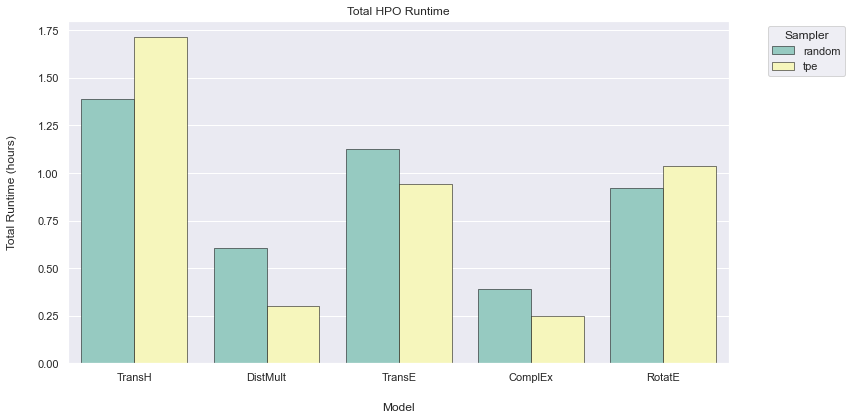

In [48]:
plt.figure(figsize=(12, 6))  # Adjust size as needed

sns.set(style="darkgrid")

# create barplot
sns.barplot(x='model', y='mean_hpo_runtime_hours', hue='sampler', data=hpo_summary, palette='Set3', errorbar="sd", linewidth=0.5, edgecolor='black')

plt.title('Total HPO Runtime')
plt.xlabel('Model', labelpad=20)
plt.ylabel('Total Runtime (hours)', labelpad=20)
# plt.xticks(rotation=45)  # Rotate model names for better readability

# Optional: Place the legend outside the plot
plt.legend(title='Sampler', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


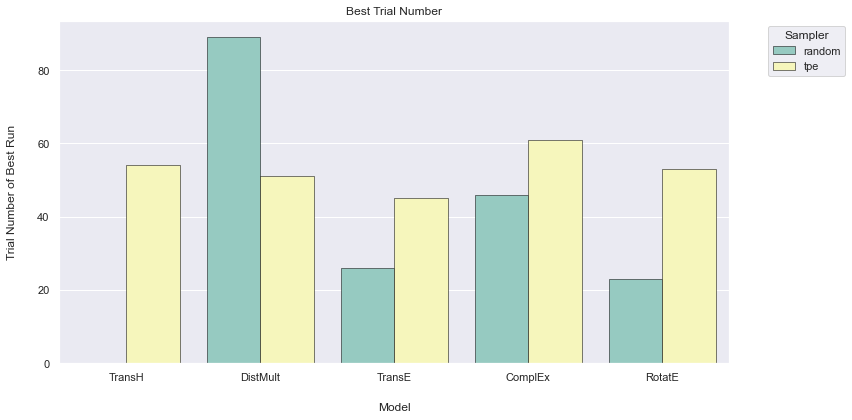

In [49]:
plt.figure(figsize=(12, 6))  # Adjust size as needed

sns.set(style="darkgrid")

# create barplot
sns.barplot(x='model', y='best_trial_number', hue='sampler', data=hpo_summary, palette='Set3', errorbar="sd", linewidth=0.5, edgecolor='black')

plt.title('Best Trial Number')
plt.xlabel('Model', labelpad=20)
plt.ylabel('Trial Number of Best Run', labelpad=20)
# plt.xticks(rotation=45)  # Rotate model names for better readability

# Optional: Place the legend outside the plot
plt.legend(title='Sampler', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


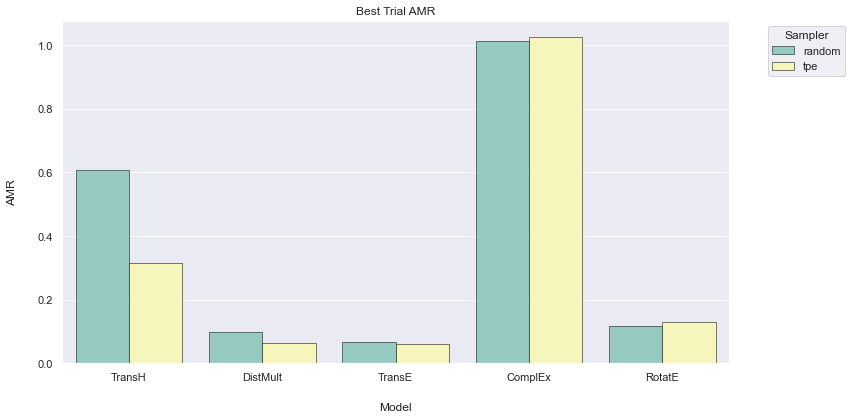

In [28]:
plt.figure(figsize=(12, 6))  # Adjust size as needed

sns.set(style="darkgrid")

# create barplot
sns.barplot(x='model', y='best_trial_AMR', hue='sampler', data=hpo_summary, palette='Set3', errorbar="sd", linewidth=0.5, edgecolor='black')

plt.title('Best Trial AMR')
plt.xlabel('Model', labelpad=20)
plt.ylabel('AMR', labelpad=20)
# plt.xticks(rotation=45)  # Rotate model names for better readability

# Optional: Place the legend outside the plot
plt.legend(title='Sampler', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


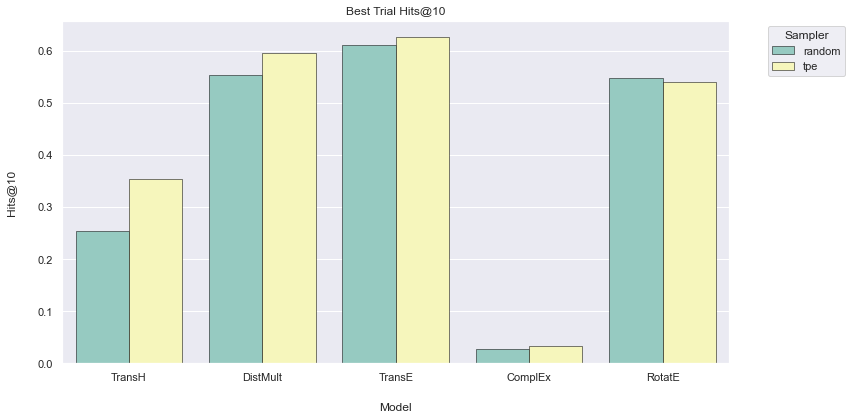

In [29]:
plt.figure(figsize=(12, 6))  # Adjust size as needed

sns.set(style="darkgrid")

# create barplot
sns.barplot(x='model', y='best_trial_hits@10', hue='sampler', data=hpo_summary, palette='Set3', errorbar="sd", linewidth=0.5, edgecolor='black')

plt.title('Best Trial Hits@10')
plt.xlabel('Model', labelpad=20)
plt.ylabel('Hits@10', labelpad=20)
# plt.xticks(rotation=45)  # Rotate model names for better readability

# Optional: Place the legend outside the plot
plt.legend(title='Sampler', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


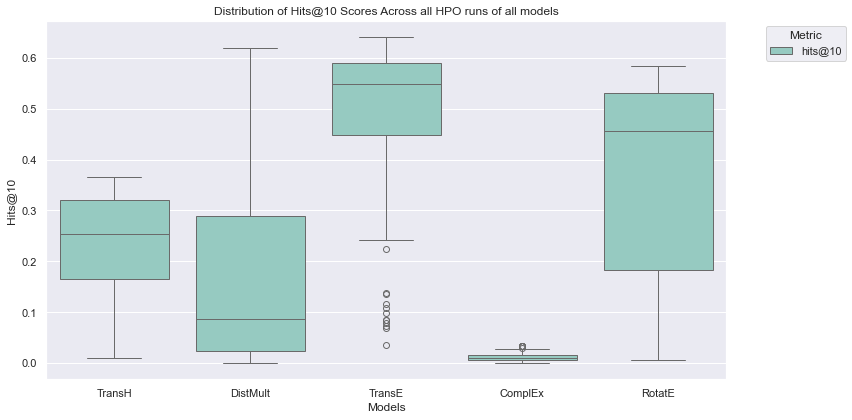

In [50]:
all_trials_hits_summary_melted = all_trials_hits_summary.melt(
    id_vars=['model'],  # Keep these columns as identifiers
    value_vars=['hits@1', 'hits@3', 'hits@5', 'hits@10'],  # These columns will be "melted"
    var_name='metric',  # Name of the new column that holds the name of the melted columns
    value_name='score')  # Name of the new column that holds the values of the melted columns

# Distribution of Hits@n Scores Across Models

plt.figure(figsize=(12, 6))  # Adjust size as needed

# Filter the data to include only Hits@10 scores
hits_10_data = all_trials_hits_summary_melted[all_trials_hits_summary_melted['metric'] == 'hits@10']


sns.set(style="darkgrid")

# Create a box plot
sns.boxplot(x='model', y='score', hue='metric', data=hits_10_data, palette='Set3')


plt.title('Distribution of Hits@10 Scores Across all HPO runs of all models')
plt.xlabel('Models')
plt.ylabel('Hits@10')
# plt.xticks(rotation=45)  # Rotate model names for better readability

# Optional: Place the legend outside the plot
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()